# **IMPORT PREMIER LEAGUE**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving combined_output.csv to combined_output.csv
Saving combined_output1.csv to combined_output1.csv
Saving combined_output2.csv to combined_output2.csv


In [57]:
import pandas as pd
for filename in uploaded.keys():
    df = pd.read_csv("combined_output.csv")
    print(df.head())

   RBallID    HomeTeam           AwayTeam            Timestamp  \
0   849137  Arsenal FC  Leicester City FC  08/11/2017 17:41:39   
1   849137  Arsenal FC  Leicester City FC  08/11/2017 17:41:46   
2   849137  Arsenal FC  Leicester City FC  08/11/2017 17:47:01   
3   849137  Arsenal FC  Leicester City FC  08/11/2017 17:49:16   
4   849137  Arsenal FC  Leicester City FC  08/11/2017 18:21:11   

              Incident  IncidentNumber  Minute  
0  Transmission Online               0       0  
1                  GCC               1       0  
2       Lineup changed               2       0  
3     Scout in Stadion               3       0  
4       Jersey Changed               4       0  
   RBallID    HomeTeam           AwayTeam            Timestamp  \
0   849137  Arsenal FC  Leicester City FC  08/11/2017 17:41:39   
1   849137  Arsenal FC  Leicester City FC  08/11/2017 17:41:46   
2   849137  Arsenal FC  Leicester City FC  08/11/2017 17:47:01   
3   849137  Arsenal FC  Leicester City FC  08

# **PREMIER LEAGUE**

     RBallID  Corners
0     849137       13
1     849138        6
2     849139       13
3     849140       21
4     849141       13
..       ...      ...
947  1229315       10
948  1229316        9
949  1229942        5
950  1229943       11
951  1229944       13

[952 rows x 2 columns]
     RBallID  Goals
0     849137      7
1     849138      6
2     849139      7
3     849140      3
4     849141      1
..       ...    ...
901  1229315      3
902  1229316      3
903  1229942      3
904  1229943      3
905  1229944      3

[906 rows x 2 columns]
     RBallID  SHG
0     849137    7
1     849138    4
2     849139   12
3     849140    7
4     849141    5
..       ...  ...
944  1229315   11
945  1229316    7
946  1229942    4
947  1229943    4
948  1229944    4

[949 rows x 2 columns]

The Median value of Corners, Goals and SHG respectively are:
 Corners    10.0
Goals       3.0
SHG         7.0
dtype: float64

The mean value of Corners, Goals and SHG respectively are:
 Corners    10.464286


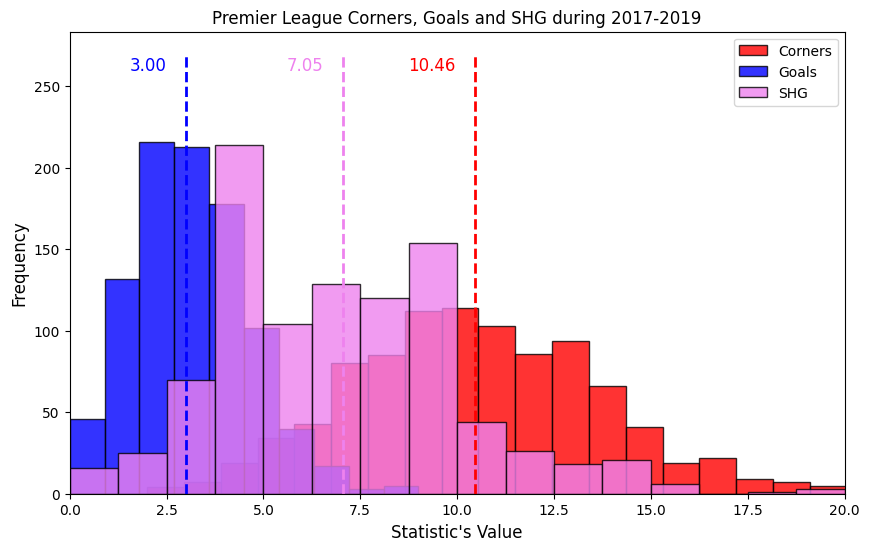

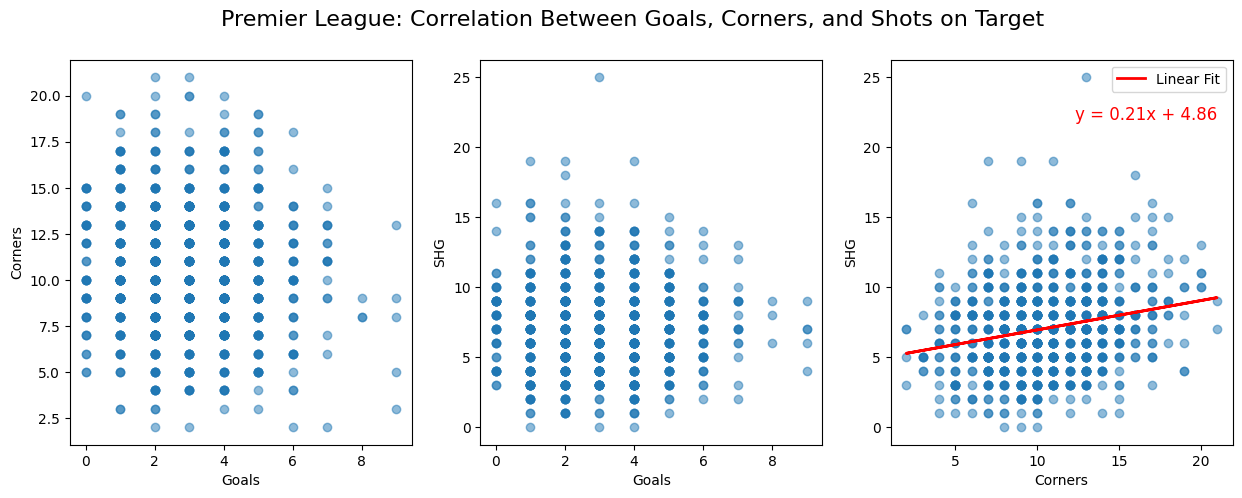

          Corners     Goals       SHG
Corners  1.000000 -0.071936  0.226535
Goals   -0.071936  1.000000 -0.010108
SHG      0.226535 -0.010108  1.000000


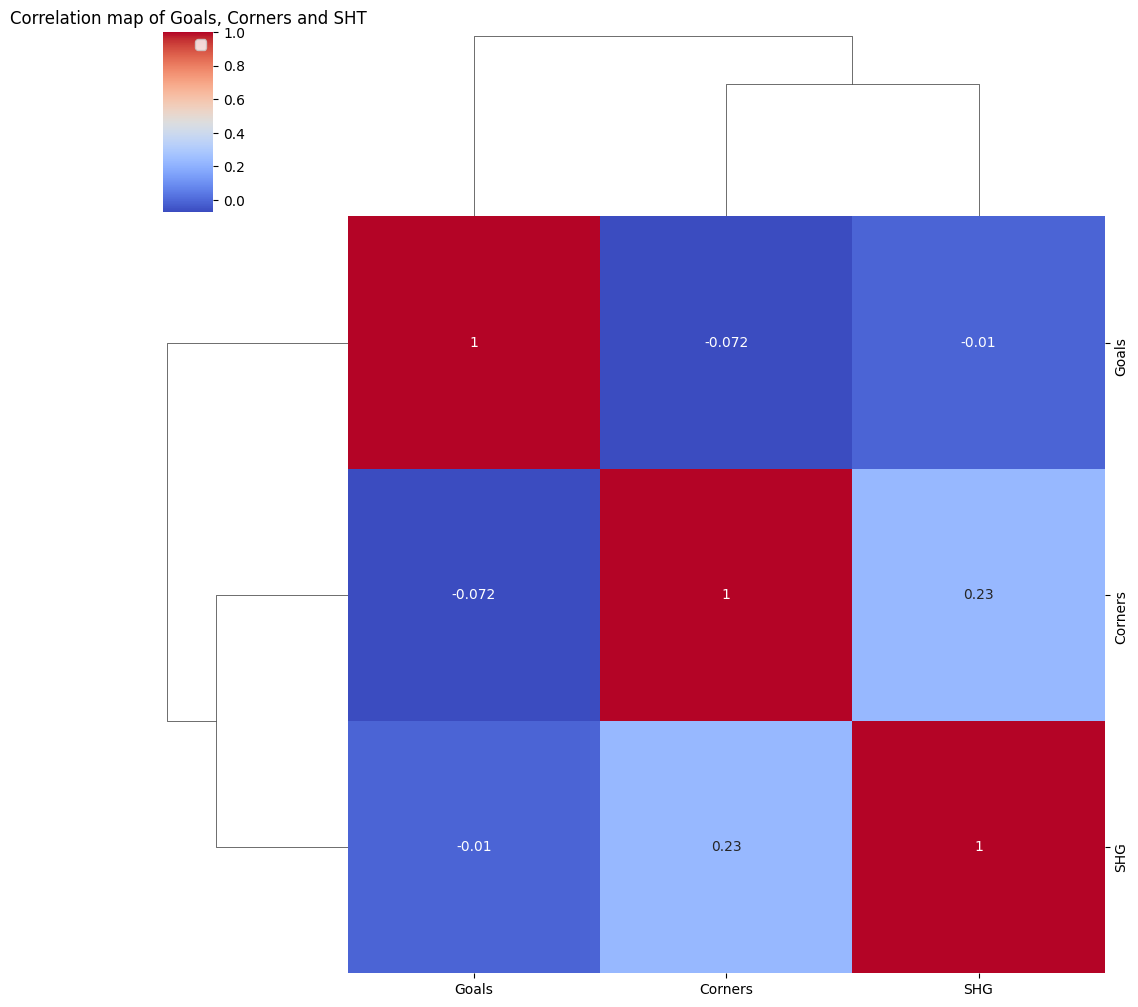

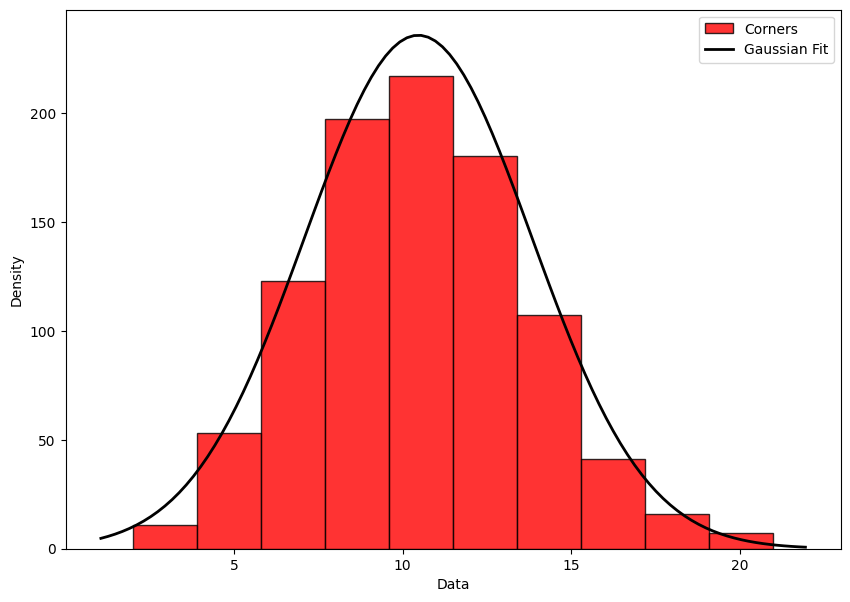

Kolmogorov-Smirnov Test: Statistics=0.078, p-value=0.000
Data does not follow a Gaussian distribution (reject H0).
Shapiro-Wilk Test: Statistics=0.988, p-value=0.000
Data does not follow a Gaussian distribution (reject H0).
Anderson-Darling Test: Statistic=4.040346164159018
At 15.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 10.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 5.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 2.5% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 1.0% level, data does not follow a Gaussian distribution (statistic >= critical value).


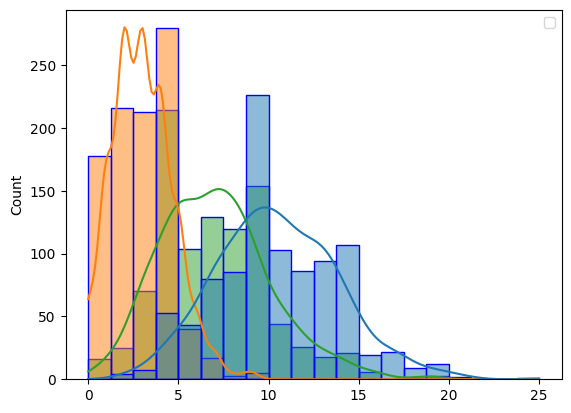


 All the statistics follow a normal distribution with a small skewness and that's the main reason that all normal distribution tests reject the null hypothesis


Skewness of Corners: 0.22085389692949003

Skewness of Goals: 0.4867752403455732

Skewness of SHG: 0.7311368547923901

Anderson-Darling Test Statistic: 2.036117763475545
Critical Values: [0.574 0.653 0.784 0.914 1.087]
Significance Levels: [15.  10.   5.   2.5  1. ]
The Corners data does not follow a Skew Normal distribution.
Anderson-Darling Test Statistic: 4.216839221150622
Critical Values: [0.574 0.653 0.784 0.914 1.087]
Significance Levels: [15.  10.   5.   2.5  1. ]
The Goals data does not follow a Skew Normal distribution.
Anderson-Darling Test Statistic: 3.0516864729584086
Critical Values: [0.574 0.653 0.784 0.914 1.087]
Significance Levels: [15.  10.   5.   2.5  1. ]
The SHG data does not follow a Skew Normal distribution.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import gaussian_kde
from scipy.stats import skew
import scipy.stats as stats

# print(df.isnull().sum())

corners = df[(df['Incident'] == 'CR1') | (df['Incident'] == 'CR2')]
corners = corners.groupby('RBallID')['Incident'].count().reset_index().rename(columns = {'Incident': 'Corners'})
print(corners)
goals = df[(df['Incident'] == 'GOAL1') | (df['Incident'] == 'GOAL2')]
goals = goals.groupby('RBallID')['Incident'].count().reset_index().rename(columns = {'Incident': 'Goals'})
print(goals)
shg = df[(df['Incident'] == 'SHG1') | (df['Incident'] == 'SHG2')]
shg = shg.groupby('RBallID')['Incident'].count().reset_index().rename(columns = {'Incident': 'SHG'})
print(shg)
stats_combined = pd.merge(corners, goals, on = 'RBallID', how = 'outer')
stats_combined = pd.merge(stats_combined, shg, on = 'RBallID', how = 'outer')
stats_combined = stats_combined.fillna(0)
stats_combined[['Corners', 'Goals', 'SHG']] = stats_combined[['Corners', 'Goals', 'SHG']].astype(int)
stats_combined.set_index('RBallID', inplace = True)
median_value = stats_combined.median()
mean_value = stats_combined.mean()
std_value = stats_combined.std()
var_value = stats_combined.var()
all_stats = stats_combined.describe()
print('\nThe Median value of Corners, Goals and SHG respectively are:\n',median_value)
print('\nThe mean value of Corners, Goals and SHG respectively are:\n',mean_value)
print('\nThe standard deviation value of Corners, Goals and SHG respectively are:\n',std_value)
print('\nThe variance value of Corners, Goals and SHG respectively are:\n',var_value)
print(all_stats)


stats_combined['Goals'] = stats_combined['Goals'].replace(0,0.001)
stats_combined['SHG'] = stats_combined['SHG'].replace(0,0.001)

colors = ['red', 'blue', 'violet']

plt.figure(figsize = (10,6))
plt.hist(stats_combined['Corners'], bins = 20, alpha = 0.8, label = 'Corners', color = colors[0], edgecolor = 'black')
plt.hist(stats_combined['Goals'], bins = 10, alpha = 0.8, label = 'Goals', color = colors[1],edgecolor = 'black')
plt.hist(stats_combined['SHG'], bins = 20, alpha = 0.8, label = 'SHG', color = colors[2],edgecolor = 'black')
# plt.vlines(median_value, ymin = 0, ymax = 270, linewidth = 2, linestyles = '--', color = colors , alpha = 1)
plt.vlines(mean_value, ymin = 0, ymax = 270, linewidth = 2, linestyles = '--', color = colors , alpha = 1)
plt.text(mean_value["Corners"]-0.5, 260, f'{mean_value["Corners"]:.2f}', fontsize=12, color= colors[0], ha='right')
plt.text(mean_value["Goals"]-0.5, 260, f'{mean_value["Goals"]:.2f}', fontsize=12, color= colors[1], ha='right')
plt.text(mean_value["SHG"]-0.5, 260, f'{mean_value["SHG"]:.2f}', fontsize=12, color= colors[2], ha='right')

plt.xlim(0, 20)
plt.xlabel("Statistic's Value", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Premier League Corners, Goals and SHG during 2017-2019')
plt.legend()
plt.show()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
ax[0].scatter(stats_combined['Goals'], stats_combined['Corners'], alpha = 0.5)
ax[0].set_xlabel('Goals')
ax[0].set_ylabel('Corners')

ax[1].scatter(stats_combined['Goals'], stats_combined['SHG'], alpha = 0.5)
ax[1].set_xlabel('Goals')
ax[1].set_ylabel('SHG')

x = stats_combined['Corners']
y = stats_combined['SHG']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
linear_fit = np.poly1d(coefficients)
ax[2].plot(x, linear_fit(x),color='red', linewidth=2, label='Linear Fit')


ax[2].text(21, 22, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12, color='red', ha='right')

ax[2].scatter(stats_combined['Corners'], stats_combined['SHG'], alpha = 0.5)
ax[2].set_xlabel('Corners')
ax[2].set_ylabel('SHG')

fig.suptitle('Premier League: Correlation Between Goals, Corners, and Shots on Target', fontsize=16)
plt.legend()
plt.show()

correlation_premier_league = stats_combined.corr()
print(correlation_premier_league)
sns.clustermap(correlation_premier_league, annot = True, cmap = 'coolwarm')
plt.title('Correlation map of Goals, Corners and SHT')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.hist(stats_combined['Corners'], bins = 10, alpha = 0.8, label = 'Corners', color = colors[0], edgecolor = 'black')
# Fit a Gaussian distribution to the data
mu, std = norm.fit(stats_combined['Corners'])

# Plot the Gaussian distribution
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

bin_width = (xmax - xmin) / 10  # assuming 20 bins
p *= len(stats_combined['Corners']) * bin_width
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()

# Perform K-S test against a normal distribution
stat, p_value = kstest(stats_combined['Corners'], 'norm', args=(mu, std))
print(f"Kolmogorov-Smirnov Test: Statistics={stat:.3f}, p-value={p_value:.3f}")

if p_value > 0.05:
    print("Data likely follows a Gaussian distribution (fail to reject H0).")
else:
    print("Data does not follow a Gaussian distribution (reject H0).")
stat, p_value = shapiro(stats_combined['Corners'])

# Shapiro-Wilk test against a normal distribution
print(f"Shapiro-Wilk Test: Statistics={stat:.3f}, p-value={p_value:.3f}")

if p_value > 0.05:
    print("Data likely follows a Gaussian distribution (fail to reject H0).")
else:
    print("Data does not follow a Gaussian distribution (reject H0).")

# Anderson test against a normal distribution
result = anderson(stats_combined['Corners'], dist='norm')
print(f"Anderson-Darling Test: Statistic={result.statistic}")

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}% level, data likely follows a Gaussian distribution (statistic < critical value).")
    else:
        print(f"At {sl}% level, data does not follow a Gaussian distribution (statistic >= critical value).")


sns.histplot(stats_combined, kde = True, edgecolor = 'blue', bins = 20)
plt.legend()
plt.show()
skewness = skew(stats_combined)

print(f"\n All the statistics follow a normal distribution with a small skewness and that's the main reason that all normal distribution tests reject the null hypothesis\n")
print(f"\nSkewness of Corners: {skewness[0]}")
print(f"\nSkewness of Goals: {skewness[1]}")
print(f"\nSkewness of SHG: {skewness[2]}\n")

#---------------------------------------------------------------------------------------------------
# Assuming `your_data` is your dataset (a 1D numpy array or pandas Series)
corner_data = np.array(stats_combined['Corners'])  # Replace with your actual data

# 1. Fit a Skew Normal distribution to your data
shape, loc, scale = stats.skewnorm.fit(corner_data)

# 2. Generate data from the fitted Skew Normal distribution
fitted_data = stats.skewnorm.rvs(shape, loc=loc, scale=scale, size=len(corner_data))

# 3. Perform the Anderson-Darling test on the generated data
ad_stat, critical_values, significance_level = stats.anderson(fitted_data, dist='norm')

# 4. Output the results
print(f"Anderson-Darling Test Statistic: {ad_stat}")
print("Critical Values:", critical_values)
print("Significance Levels:", significance_level)

# Compare the AD test statistic with the critical values to determine fit
if ad_stat < critical_values[2]:  # Usually, the third value corresponds to 5% significance level
    print("The Corners data follows a Skew Normal distribution.")
else:
    print("The Corners data does not follow a Skew Normal distribution.")


#---------------------------------------------------------------------------------------------------
# Assuming `your_data` is your dataset (a 1D numpy array or pandas Series)
corner_data = np.array(stats_combined['Goals'])  # Replace with your actual data

# 1. Fit a Skew Normal distribution to your data
shape, loc, scale = stats.skewnorm.fit(corner_data)

# 2. Generate data from the fitted Skew Normal distribution
fitted_data = stats.skewnorm.rvs(shape, loc=loc, scale=scale, size=len(corner_data))

# 3. Perform the Anderson-Darling test on the generated data
ad_stat, critical_values, significance_level = stats.anderson(fitted_data, dist='norm')

# 4. Output the results
print(f"Anderson-Darling Test Statistic: {ad_stat}")
print("Critical Values:", critical_values)
print("Significance Levels:", significance_level)

# Compare the AD test statistic with the critical values to determine fit
if ad_stat < critical_values[2]:  # Usually, the third value corresponds to 5% significance level
    print("The Goals data follows a Skew Normal distribution.")
else:
    print("The Goals data does not follow a Skew Normal distribution.")

#---------------------------------------------------------------------------------------------------

# Assuming `your_data` is your dataset (a 1D numpy array or pandas Series)
corner_data = np.array(stats_combined['SHG'])  # Replace with your actual data

# 1. Fit a Skew Normal distribution to your data
shape, loc, scale = stats.skewnorm.fit(corner_data)

# 2. Generate data from the fitted Skew Normal distribution
fitted_data = stats.skewnorm.rvs(shape, loc=loc, scale=scale, size=len(corner_data))

# 3. Perform the Anderson-Darling test on the generated data
ad_stat, critical_values, significance_level = stats.anderson(fitted_data, dist='norm')

# 4. Output the results
print(f"Anderson-Darling Test Statistic: {ad_stat}")
print("Critical Values:", critical_values)
print("Significance Levels:", significance_level)

# Compare the AD test statistic with the critical values to determine fit
if ad_stat < critical_values[2]:  # Usually, the third value corresponds to 5% significance level
    print("The SHG data follows a Skew Normal distribution.")
else:
    print("The SHG data does not follow a Skew Normal distribution.")


In [5]:
# Pearson Correlation
pearson_corr = stats_combined.corr(method='pearson')
print("Pearson Correlation:\n", pearson_corr)

# Spearman Correlation
spearman_corr = stats_combined.corr(method='spearman')
print("\nSpearman Correlation:\n", spearman_corr)

# Kendall Correlation
kendall_corr = stats_combined.corr(method='kendall')
print("\nKendall Correlation:\n", kendall_corr)


Pearson Correlation:
           Corners     Goals       SHG
Corners  1.000000 -0.071935  0.226535
Goals   -0.071935  1.000000 -0.010113
SHG      0.226535 -0.010113  1.000000

Spearman Correlation:
           Corners     Goals       SHG
Corners  1.000000 -0.057868  0.208933
Goals   -0.057868  1.000000 -0.008686
SHG      0.208933 -0.008686  1.000000

Kendall Correlation:
           Corners     Goals       SHG
Corners  1.000000 -0.043008  0.152409
Goals   -0.043008  1.000000 -0.006227
SHG      0.152409 -0.006227  1.000000


In [6]:
# Perform K-S test against a normal distribution
stat, p_value = kstest(stats_combined['Corners'], 'norm', args=(mu, std))
print(f"Kolmogorov-Smirnov Test: Statistics={stat:.3f}, p-value={p_value:.3f}")

if p_value > 0.05:
    print("Data likely follows a Gaussian distribution (fail to reject H0).")
else:
    print("Data does not follow a Gaussian distribution (reject H0).")
stat, p_value = shapiro(stats_combined['Corners'])

# Shapiro-Wilk test against a normal distribution
print(f"Shapiro-Wilk Test: Statistics={stat:.3f}, p-value={p_value:.3f}")

if p_value > 0.05:
    print("Data likely follows a Gaussian distribution (fail to reject H0).")
else:
    print("Data does not follow a Gaussian distribution (reject H0).")

# Anderson test against a normal distribution
result = anderson(stats_combined['Corners'], dist='norm')
print(f"Anderson-Darling Test: Statistic={result.statistic}")

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}% level, data likely follows a Gaussian distribution (statistic < critical value).")
    else:
        print(f"At {sl}% level, data does not follow a Gaussian distribution (statistic >= critical value).")

Kolmogorov-Smirnov Test: Statistics=0.078, p-value=0.000
Data does not follow a Gaussian distribution (reject H0).
Shapiro-Wilk Test: Statistics=0.988, p-value=0.000
Data does not follow a Gaussian distribution (reject H0).
Anderson-Darling Test: Statistic=4.040346164159018
At 15.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 10.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 5.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 2.5% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 1.0% level, data does not follow a Gaussian distribution (statistic >= critical value).


# **TEST DIFFERENT DISTRIBUTIONS IN PREMIER LEAGUE**

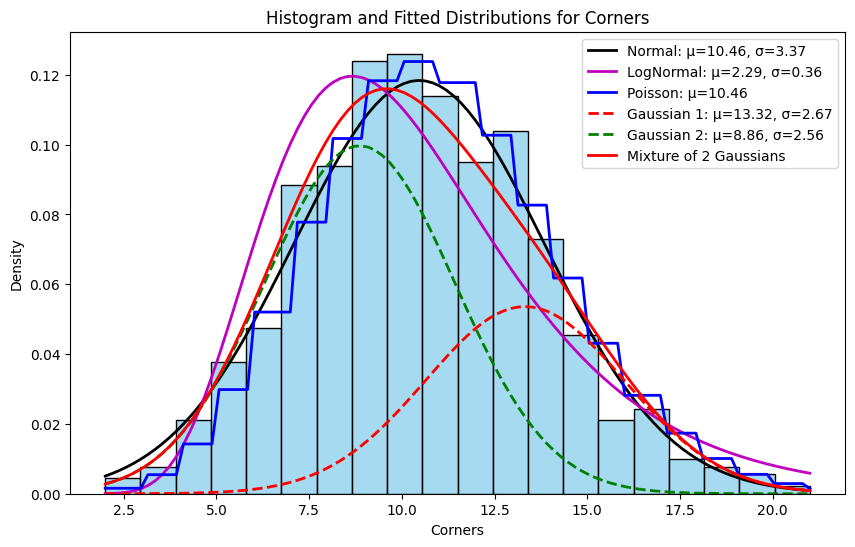

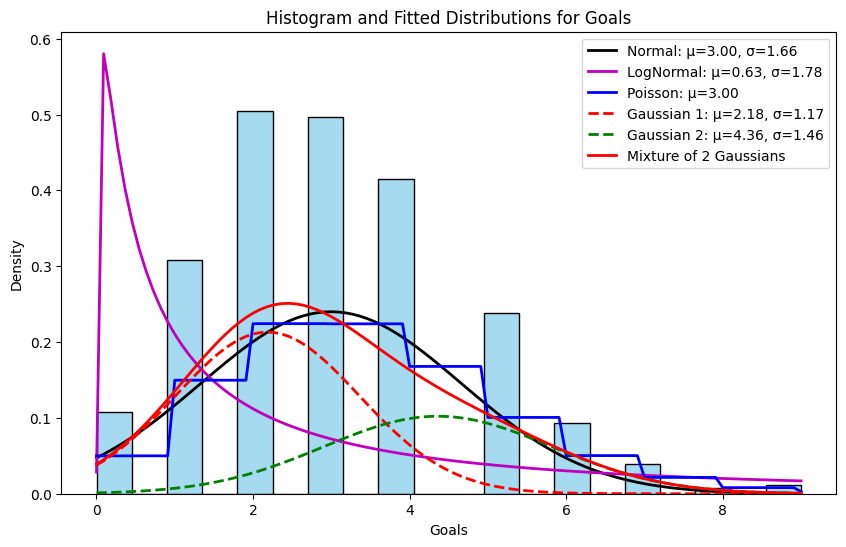

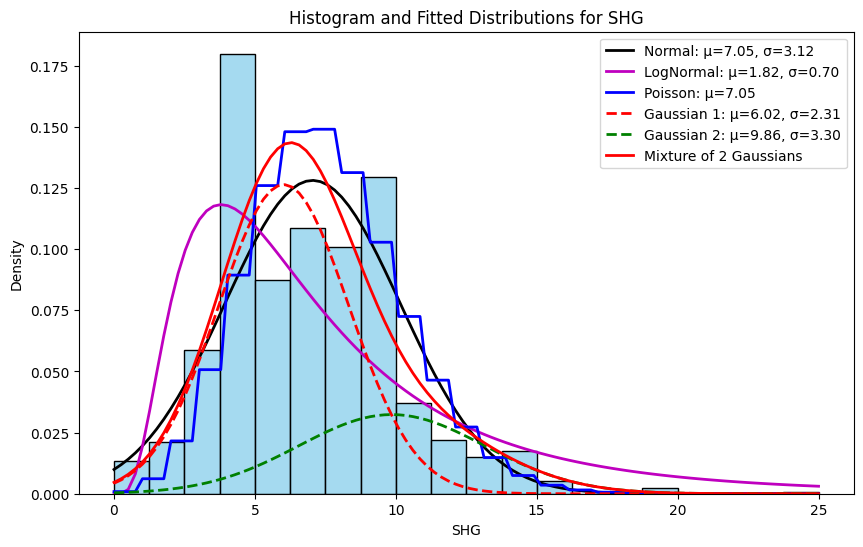

In [53]:
from scipy.stats import norm, poisson, nbinom, lognorm
from sklearn.mixture import GaussianMixture

def plot_hist_with_distributions(data, column):
    plt.figure(figsize=(10, 6))

    # Plot the histogram
    sns.histplot(data[column], kde=False, stat="density", bins=20, color='skyblue', edgecolor='black')


    # Fit and plot the Gaussian (Normal) distribution
    mu, std = norm.fit(data[column])
    x = np.linspace(data[column].min(), data[column].max(), 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label=f'Normal: μ={mu:.2f}, σ={std:.2f}')

    # Fit and plot the lognormal distribution
    shape, loc, scale = lognorm.fit(data[column], floc=0)
    p_lognorm = lognorm.pdf(x, shape, loc=loc, scale=scale)
    plt.plot(x, p_lognorm, 'm', linewidth=2, label=f'LogNormal: μ={np.log(scale):.2f}, σ={shape:.2f}')

    # Fit and plot the Poisson distribution
    mu_poisson = np.mean(data[column])
    p_poisson = poisson.pmf(np.floor(x), mu_poisson)
    plt.plot(x, p_poisson, 'b', linewidth=2, label=f'Poisson: μ={mu_poisson:.2f}')

    # Fit and plot a mixture of 2 Gaussian distributions
    gmm = GaussianMixture(n_components=2)
    gmm.fit(data[column].values.reshape(-1, 1))

    # Get the parameters for the two Gaussian components
    means = gmm.means_.flatten()
    stds = np.sqrt(gmm.covariances_).flatten()
    weights = gmm.weights_.flatten()

    # Plot the two Gaussians individually
    p_gmm1 = weights[0] * norm.pdf(x, means[0], stds[0])
    p_gmm2 = weights[1] * norm.pdf(x, means[1], stds[1])

    plt.plot(x, p_gmm1, 'r--', linewidth=2, label=f'Gaussian 1: μ={means[0]:.2f}, σ={stds[0]:.2f}')
    plt.plot(x, p_gmm2, 'g--', linewidth=2, label=f'Gaussian 2: μ={means[1]:.2f}, σ={stds[1]:.2f}')

    # Plot the combined GMM
    p_gmm = p_gmm1 + p_gmm2
    plt.plot(x, p_gmm, 'r', linewidth=2, label='Mixture of 2 Gaussians')


    # Fit and plot a polynomial curve (e.g., degree 2)
    # degree = 8
    # poly_coefficients = np.polyfit(data[column], norm.pdf(data[column], mu, std), degree)
    # poly = np.poly1d(poly_coefficients)
    # plt.plot(x, poly(x), 'y--', linewidth=2, label=f'Polynomial (degree {degree})')



    plt.title(f'Histogram and Fitted Distributions for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Apply the function to each column in the dataframe
for column in ['Corners', 'Goals', 'SHG']:
    plot_hist_with_distributions(stats_combined, column)

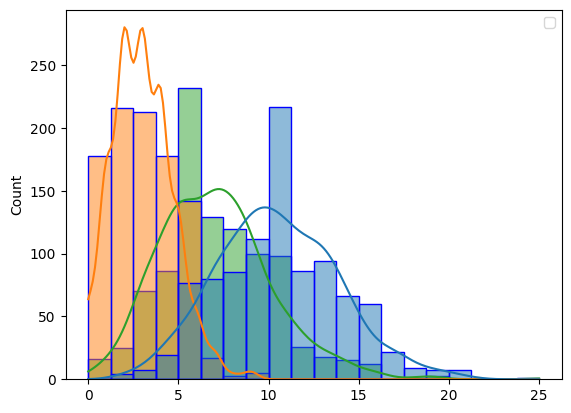

[0.2208539  0.48650265 0.73111933]


In [8]:
sns.histplot(stats_combined, kde = True, edgecolor = 'blue', bins = 20)
plt.legend()
plt.show()
skewness = skew(stats_combined)
print(skewness)

# **IMPORT LEAGUE 1**

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving combined_output1.csv to combined_output1.csv
   RBallID    HomeTeam           AwayTeam            Timestamp  \
0   849137  Arsenal FC  Leicester City FC  08/11/2017 17:41:39   
1   849137  Arsenal FC  Leicester City FC  08/11/2017 17:41:46   
2   849137  Arsenal FC  Leicester City FC  08/11/2017 17:47:01   
3   849137  Arsenal FC  Leicester City FC  08/11/2017 17:49:16   
4   849137  Arsenal FC  Leicester City FC  08/11/2017 18:21:11   

              Incident  IncidentNumber  Minute  
0  Transmission Online               0       0  
1                  GCC               1       0  
2       Lineup changed               2       0  
3     Scout in Stadion               3       0  
4       Jersey Changed               4       0  


In [55]:
for filename in uploaded.keys():
    df1 = pd.read_csv("combined_output1.csv")


     RBallID  Corners
0     851744       10
1     851745       11
2     851746        7
3     851747        6
4     851748       12
..       ...      ...
930  1226414        8
931  1226415        9
932  1226416       16
933  1226417       10
934  1226418       11

[935 rows x 2 columns]
     RBallID  Goals
0     851744      5
1     851745      2
2     851746      4
3     851747      4
4     851748      2
..       ...    ...
876  1226414      2
877  1226415      3
878  1226416      3
879  1226417      5
880  1226418      5

[881 rows x 2 columns]
     RBallID  SHG
0     851744    5
1     851745    5
2     851746   10
3     851747    6
4     851748    2
..       ...  ...
929  1226414    6
930  1226415    6
931  1226416    7
932  1226417   13
933  1226418   12

[934 rows x 2 columns]

The Median value of Corners, Goals and SHG respectively are:
 Corners    9.0
Goals      3.0
SHG        7.0
dtype: float64

The mean value of Corners, Goals and SHG respectively are:
 Corners    9.730481
Goal

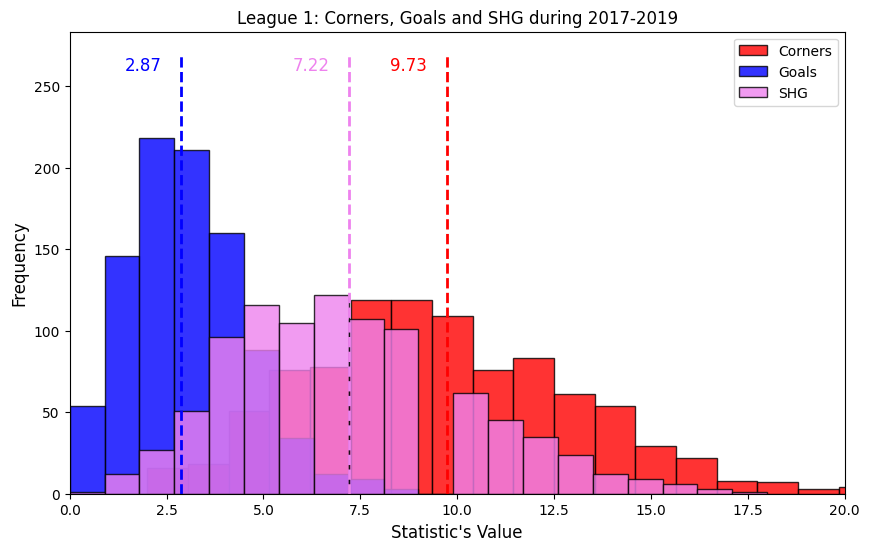

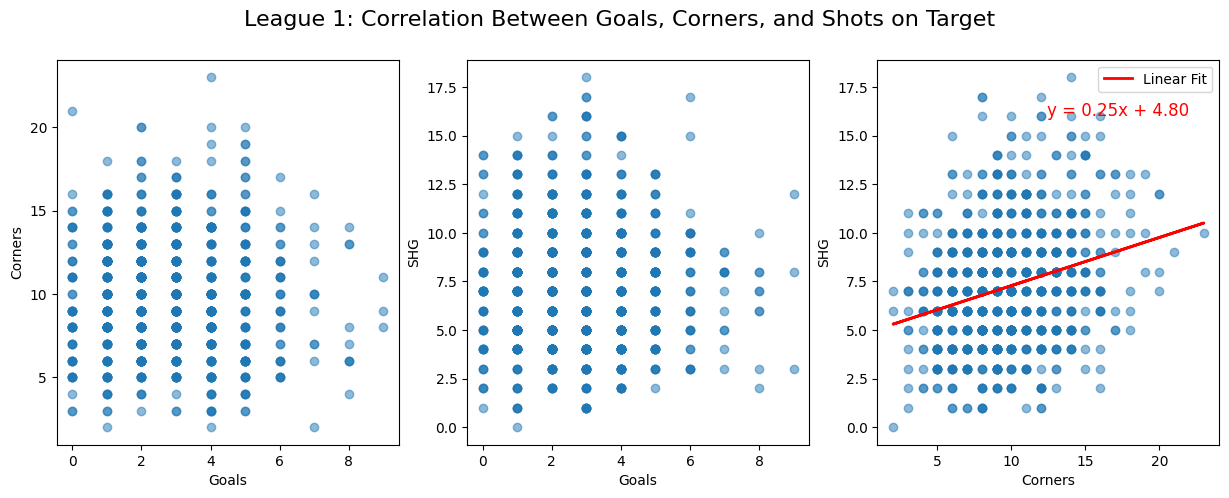

          Corners     Goals       SHG
Corners  1.000000 -0.006970  0.265793
Goals   -0.006970  1.000000  0.002181
SHG      0.265793  0.002181  1.000000


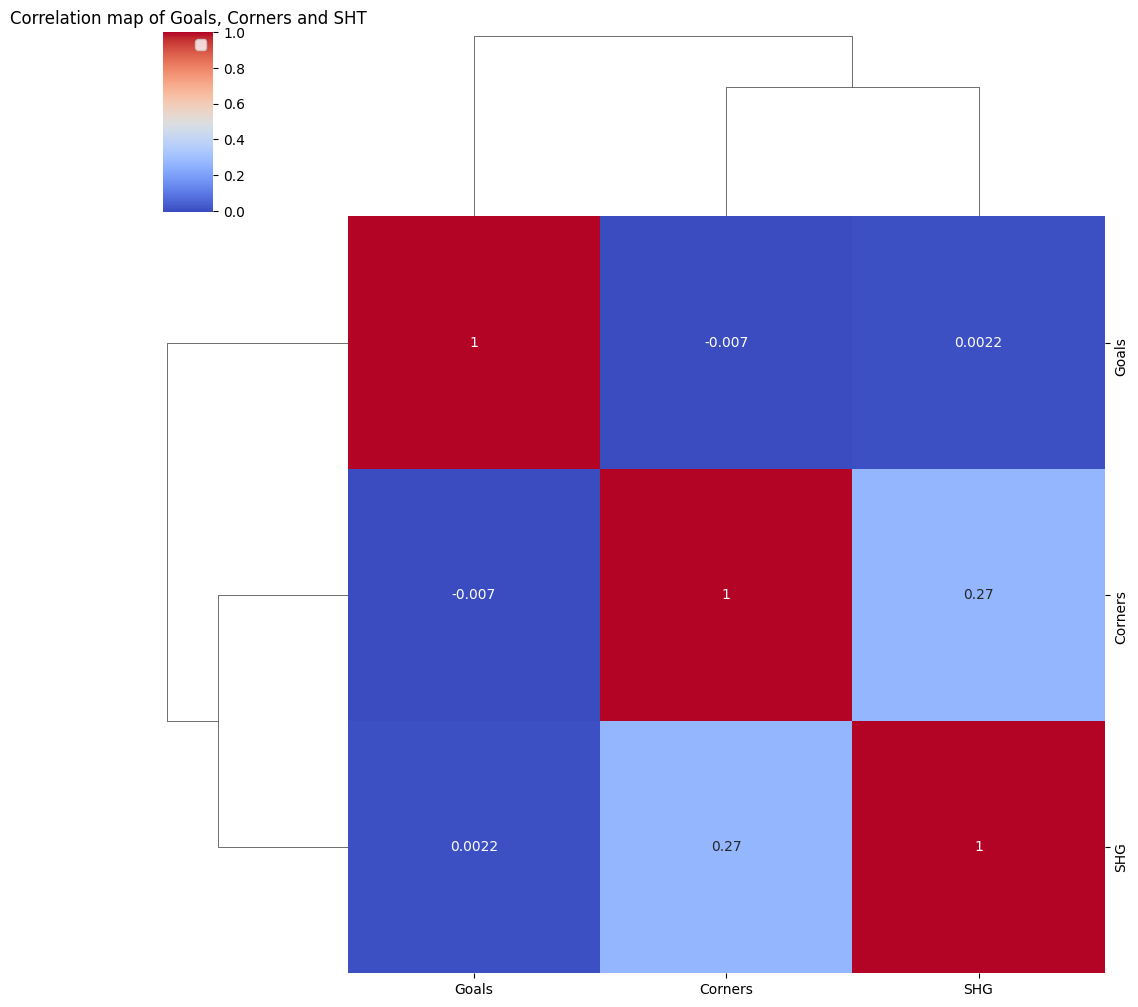

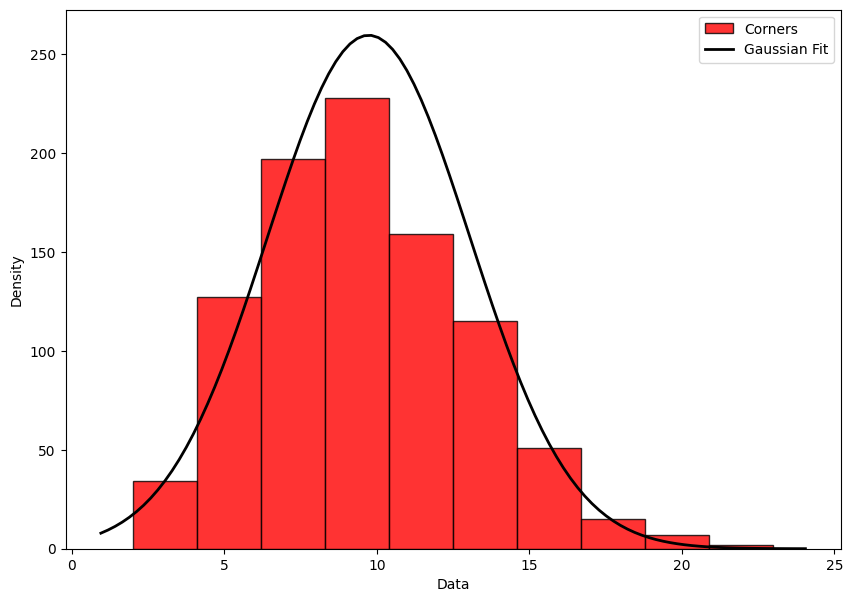

Kolmogorov-Smirnov Test: Statistics=0.097, p-value=0.000
Data does not follow a Gaussian distribution (reject H0).
Shapiro-Wilk Test: Statistics=0.981, p-value=0.000
Data does not follow a Gaussian distribution (reject H0).
Anderson-Darling Test: Statistic=5.7867850026840415
At 15.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 10.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 5.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 2.5% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 1.0% level, data does not follow a Gaussian distribution (statistic >= critical value).


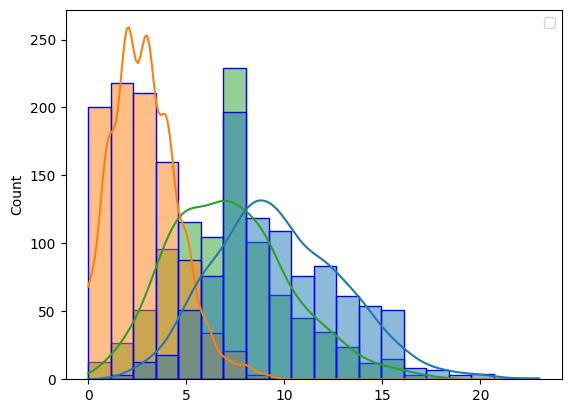


 All the statistics follow a normal distribution with a small skewness and that's the main reason that all normal distribution tests reject the null hypothesis


Skewness of Corners: 0.41830215724626574

Skewness of Goals: 0.5750128923733036

Skewness of SHG: 0.48457157047734994

Anderson-Darling Test Statistic: 1.7575687869197054
Critical Values: [0.574 0.653 0.784 0.914 1.087]
Significance Levels: [15.  10.   5.   2.5  1. ]
The Corners data does not follow a Skew Normal distribution.
Anderson-Darling Test Statistic: 4.13851180054337
Critical Values: [0.574 0.653 0.784 0.914 1.087]
Significance Levels: [15.  10.   5.   2.5  1. ]
The Goals data does not follow a Skew Normal distribution.
Anderson-Darling Test Statistic: 4.117476174332751
Critical Values: [0.574 0.653 0.784 0.914 1.087]
Significance Levels: [15.  10.   5.   2.5  1. ]
The SHG data does not follow a Skew Normal distribution.


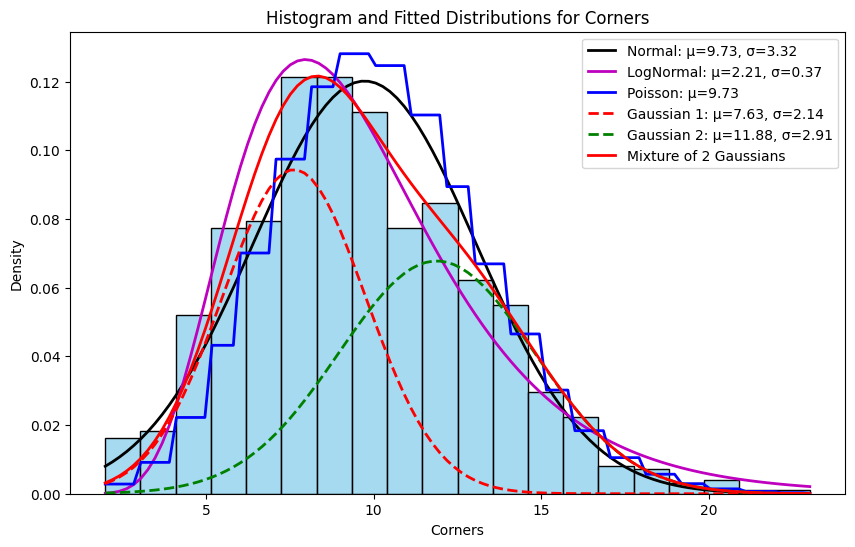

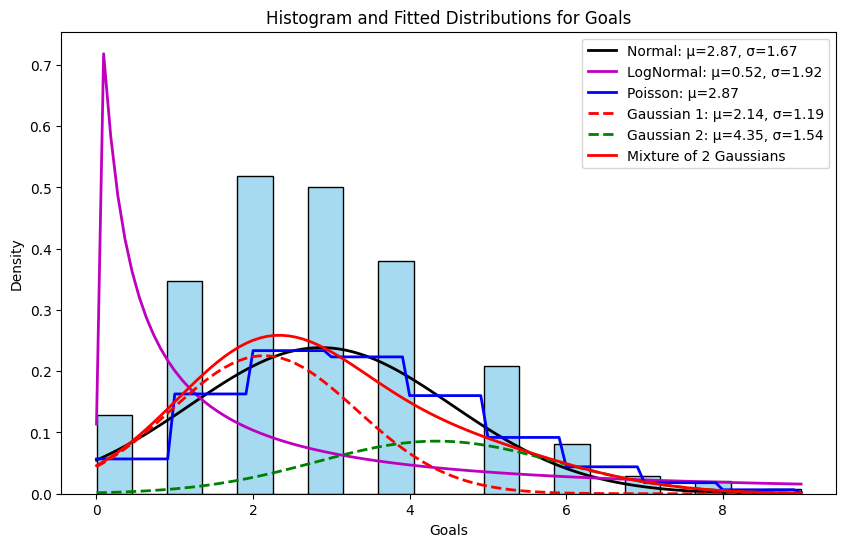

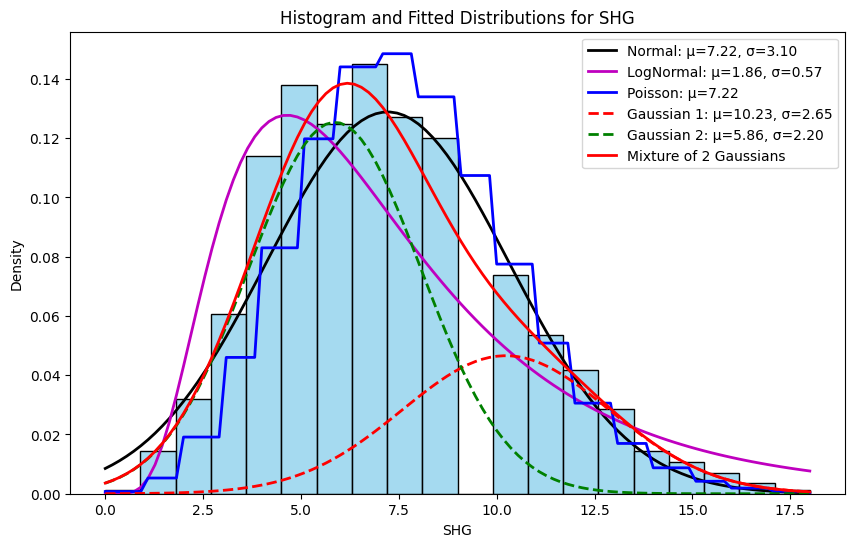

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import gaussian_kde
from scipy.stats import skew
import scipy.stats as stats

# print(df.isnull().sum())

corners1 = df1[(df1['Incident'] == 'CR1') | (df1['Incident'] == 'CR2')]
corners1 = corners1.groupby('RBallID')['Incident'].count().reset_index().rename(columns = {'Incident': 'Corners'})
print(corners1)
goals1 = df1[(df1['Incident'] == 'GOAL1') | (df1['Incident'] == 'GOAL2')]
goals1 = goals1.groupby('RBallID')['Incident'].count().reset_index().rename(columns = {'Incident': 'Goals'})
print(goals1)
shg1 = df1[(df1['Incident'] == 'SHG1') | (df1['Incident'] == 'SHG2')]
shg1 = shg1.groupby('RBallID')['Incident'].count().reset_index().rename(columns = {'Incident': 'SHG'})
print(shg1)
stats_combined1 = pd.merge(corners1, goals1, on = 'RBallID', how = 'outer')
stats_combined1 = pd.merge(stats_combined1, shg1, on = 'RBallID', how = 'outer')
stats_combined1 = stats_combined1.fillna(0)
stats_combined1[['Corners', 'Goals', 'SHG']] = stats_combined1[['Corners', 'Goals', 'SHG']].astype(int)
stats_combined1.set_index('RBallID', inplace = True)
median_value1 = stats_combined1.median()
mean_value1 = stats_combined1.mean()
std_value1 = stats_combined1.std()
var_value1 = stats_combined1.var()
all_stats1 = stats_combined1.describe()

stats_combined1['Goals'] = stats_combined1['Goals'].replace(0,0.001)
stats_combined1['SHG'] = stats_combined1['SHG'].replace(0,0.001)

print('\nThe Median value of Corners, Goals and SHG respectively are:\n',median_value1)
print('\nThe mean value of Corners, Goals and SHG respectively are:\n',mean_value1)
print('\nThe standard deviation value of Corners, Goals and SHG respectively are:\n',std_value1)
print('\nThe variance value of Corners, Goals and SHG respectively are:\n',var_value1)
print(all_stats1)

colors = ['red', 'blue', 'violet']

plt.figure(figsize = (10,6))
plt.hist(stats_combined1['Corners'], bins = 20, alpha = 0.8, label = 'Corners', color = colors[0], edgecolor = 'black')
plt.hist(stats_combined1['Goals'], bins = 10, alpha = 0.8, label = 'Goals', color = colors[1],edgecolor = 'black')
plt.hist(stats_combined1['SHG'], bins = 20, alpha = 0.8, label = 'SHG', color = colors[2],edgecolor = 'black')
# plt.vlines(median_value, ymin = 0, ymax = 270, linewidth = 2, linestyles = '--', color = colors , alpha = 1)
plt.vlines(mean_value1, ymin = 0, ymax = 270, linewidth = 2, linestyles = '--', color = colors , alpha = 1)
plt.text(mean_value1["Corners"]-0.5, 260, f'{mean_value1["Corners"]:.2f}', fontsize=12, color= colors[0], ha='right')
plt.text(mean_value1["Goals"]-0.5, 260, f'{mean_value1["Goals"]:.2f}', fontsize=12, color= colors[1], ha='right')
plt.text(mean_value1["SHG"]-0.5, 260, f'{mean_value1["SHG"]:.2f}', fontsize=12, color= colors[2], ha='right')

plt.xlim(0, 20)
plt.xlabel("Statistic's Value", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('League 1: Corners, Goals and SHG during 2017-2019')
plt.legend()
plt.show()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
ax[0].scatter(stats_combined1['Goals'], stats_combined1['Corners'], alpha = 0.5)
ax[0].set_xlabel('Goals')
ax[0].set_ylabel('Corners')

ax[1].scatter(stats_combined1['Goals'], stats_combined1['SHG'], alpha = 0.5)
ax[1].set_xlabel('Goals')
ax[1].set_ylabel('SHG')

x = stats_combined1['Corners']
y = stats_combined1['SHG']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
linear_fit = np.poly1d(coefficients)
ax[2].plot(x, linear_fit(x),color='red', linewidth=2, label='Linear Fit')


ax[2].text(22, 16, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12, color='red', ha='right')

ax[2].scatter(stats_combined1['Corners'], stats_combined1['SHG'], alpha = 0.5)
ax[2].set_xlabel('Corners')
ax[2].set_ylabel('SHG')

fig.suptitle('League 1: Correlation Between Goals, Corners, and Shots on Target', fontsize=16)
plt.legend()
plt.show()

correlation_league_1 = stats_combined1.corr()
print(correlation_league_1)
sns.clustermap(correlation_league_1, annot = True, cmap = 'coolwarm')
plt.title('Correlation map of Goals, Corners and SHT')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.hist(stats_combined1['Corners'], bins = 10, alpha = 0.8, label = 'Corners', color = colors[0], edgecolor = 'black')
# Fit a Gaussian distribution to the data
mu, std = norm.fit(stats_combined1['Corners'])

# Plot the Gaussian distribution
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

bin_width = (xmax - xmin) / 10  # assuming 20 bins
p *= len(stats_combined1['Corners']) * bin_width
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()

# Perform K-S test against a normal distribution
stat, p_value = kstest(stats_combined1['Corners'], 'norm', args=(mu, std))
print(f"Kolmogorov-Smirnov Test: Statistics={stat:.3f}, p-value={p_value:.3f}")

if p_value > 0.05:
    print("Data likely follows a Gaussian distribution (fail to reject H0).")
else:
    print("Data does not follow a Gaussian distribution (reject H0).")
stat, p_value = shapiro(stats_combined1['Corners'])

# Shapiro-Wilk test against a normal distribution
print(f"Shapiro-Wilk Test: Statistics={stat:.3f}, p-value={p_value:.3f}")

if p_value > 0.05:
    print("Data likely follows a Gaussian distribution (fail to reject H0).")
else:
    print("Data does not follow a Gaussian distribution (reject H0).")

# Anderson test against a normal distribution
result1 = anderson(stats_combined1['Corners'], dist='norm')
print(f"Anderson-Darling Test: Statistic={result1.statistic}")

for i in range(len(result1.critical_values)):
    sl, cv = result1.significance_level[i], result1.critical_values[i]
    if result1.statistic < cv:
        print(f"At {sl}% level, data likely follows a Gaussian distribution (statistic < critical value).")
    else:
        print(f"At {sl}% level, data does not follow a Gaussian distribution (statistic >= critical value).")


sns.histplot(stats_combined1, kde = True, edgecolor = 'blue', bins = 20)
plt.legend()
plt.show()
skewness1 = skew(stats_combined1)

print(f"\n All the statistics follow a normal distribution with a small skewness and that's the main reason that all normal distribution tests reject the null hypothesis\n")
print(f"\nSkewness of Corners: {skewness1[0]}")
print(f"\nSkewness of Goals: {skewness1[1]}")
print(f"\nSkewness of SHG: {skewness1[2]}\n")

#---------------------------------------------------------------------------------------------------
# Assuming `your_data` is your dataset (a 1D numpy array or pandas Series)
corner_data1 = np.array(stats_combined1['Corners'])  # Replace with your actual data

# 1. Fit a Skew Normal distribution to your data
shape, loc, scale = stats.skewnorm.fit(corner_data1)

# 2. Generate data from the fitted Skew Normal distribution
fitted_data1 = stats.skewnorm.rvs(shape, loc=loc, scale=scale, size=len(corner_data1))

# 3. Perform the Anderson-Darling test on the generated data
ad_stat, critical_values, significance_level = stats.anderson(fitted_data1, dist='norm')

# 4. Output the results
print(f"Anderson-Darling Test Statistic: {ad_stat}")
print("Critical Values:", critical_values)
print("Significance Levels:", significance_level)

# Compare the AD test statistic with the critical values to determine fit
if ad_stat < critical_values[2]:  # Usually, the third value corresponds to 5% significance level
    print("The Corners data follows a Skew Normal distribution.")
else:
    print("The Corners data does not follow a Skew Normal distribution.")


#---------------------------------------------------------------------------------------------------
# Assuming `your_data` is your dataset (a 1D numpy array or pandas Series)
corner_data1 = np.array(stats_combined1['Goals'])  # Replace with your actual data

# 1. Fit a Skew Normal distribution to your data
shape, loc, scale = stats.skewnorm.fit(corner_data1)

# 2. Generate data from the fitted Skew Normal distribution
fitted_data1 = stats.skewnorm.rvs(shape, loc=loc, scale=scale, size=len(corner_data1))

# 3. Perform the Anderson-Darling test on the generated data
ad_stat, critical_values, significance_level = stats.anderson(fitted_data1, dist='norm')

# 4. Output the results
print(f"Anderson-Darling Test Statistic: {ad_stat}")
print("Critical Values:", critical_values)
print("Significance Levels:", significance_level)

# Compare the AD test statistic with the critical values to determine fit
if ad_stat < critical_values[2]:  # Usually, the third value corresponds to 5% significance level
    print("The Goals data follows a Skew Normal distribution.")
else:
    print("The Goals data does not follow a Skew Normal distribution.")

#---------------------------------------------------------------------------------------------------

# Assuming `your_data` is your dataset (a 1D numpy array or pandas Series)
corner_data1 = np.array(stats_combined1['SHG'])  # Replace with your actual data

# 1. Fit a Skew Normal distribution to your data
shape, loc, scale = stats.skewnorm.fit(corner_data1)

# 2. Generate data from the fitted Skew Normal distribution
fitted_data1 = stats.skewnorm.rvs(shape, loc=loc, scale=scale, size=len(corner_data1))

# 3. Perform the Anderson-Darling test on the generated data
ad_stat, critical_values, significance_level = stats.anderson(fitted_data1, dist='norm')

# 4. Output the results
print(f"Anderson-Darling Test Statistic: {ad_stat}")
print("Critical Values:", critical_values)
print("Significance Levels:", significance_level)

# Compare the AD test statistic with the critical values to determine fit
if ad_stat < critical_values[2]:  # Usually, the third value corresponds to 5% significance level
    print("The SHG data follows a Skew Normal distribution.")
else:
    print("The SHG data does not follow a Skew Normal distribution.")


for column in ['Corners', 'Goals', 'SHG']:
    plot_hist_with_distributions(stats_combined1, column)

In [11]:
# Pearson Correlation
pearson_corr1 = stats_combined1.corr(method='pearson')
print("Pearson Correlation:\n", pearson_corr1)

# Spearman Correlation
spearman_corr1 = stats_combined1.corr(method='spearman')
print("\nSpearman Correlation:\n", spearman_corr1)

# Kendall Correlation
kendall_corr1 = stats_combined1.corr(method='kendall')
print("\nKendall Correlation:\n", kendall_corr1)


Pearson Correlation:
           Corners     Goals       SHG
Corners  1.000000 -0.006963  0.265794
Goals   -0.006963  1.000000  0.002184
SHG      0.265794  0.002184  1.000000

Spearman Correlation:
           Corners     Goals       SHG
Corners  1.000000 -0.015534  0.253083
Goals   -0.015534  1.000000  0.007043
SHG      0.253083  0.007043  1.000000

Kendall Correlation:
           Corners     Goals       SHG
Corners  1.000000 -0.012592  0.183986
Goals   -0.012592  1.000000  0.005112
SHG      0.183986  0.005112  1.000000


In [12]:
# Perform K-S test against a normal distribution
stat, p_value = kstest(stats_combined1['Corners'], 'norm', args=(mu, std))
print(f"Kolmogorov-Smirnov Test: Statistics={stat:.3f}, p-value={p_value:.3f}")

if p_value > 0.05:
    print("Data likely follows a Gaussian distribution (fail to reject H0).")
else:
    print("Data does not follow a Gaussian distribution (reject H0).")
stat, p_value = shapiro(stats_combined1['Corners'])

# Shapiro-Wilk test against a normal distribution
print(f"Shapiro-Wilk Test: Statistics={stat:.3f}, p-value={p_value:.3f}")

if p_value > 0.05:
    print("Data likely follows a Gaussian distribution (fail to reject H0).")
else:
    print("Data does not follow a Gaussian distribution (reject H0).")

# Anderson test against a normal distribution
result = anderson(stats_combined1['Corners'], dist='norm')
print(f"Anderson-Darling Test: Statistic={result.statistic}")

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}% level, data likely follows a Gaussian distribution (statistic < critical value).")
    else:
        print(f"At {sl}% level, data does not follow a Gaussian distribution (statistic >= critical value).")

Kolmogorov-Smirnov Test: Statistics=0.097, p-value=0.000
Data does not follow a Gaussian distribution (reject H0).
Shapiro-Wilk Test: Statistics=0.981, p-value=0.000
Data does not follow a Gaussian distribution (reject H0).
Anderson-Darling Test: Statistic=5.7867850026840415
At 15.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 10.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 5.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 2.5% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 1.0% level, data does not follow a Gaussian distribution (statistic >= critical value).


# **IMPORT LA LIGA**

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving combined_output2.csv to combined_output2.csv
   RBallID    HomeTeam           AwayTeam            Timestamp  \
0   849137  Arsenal FC  Leicester City FC  08/11/2017 17:41:39   
1   849137  Arsenal FC  Leicester City FC  08/11/2017 17:41:46   
2   849137  Arsenal FC  Leicester City FC  08/11/2017 17:47:01   
3   849137  Arsenal FC  Leicester City FC  08/11/2017 17:49:16   
4   849137  Arsenal FC  Leicester City FC  08/11/2017 18:21:11   

              Incident  IncidentNumber  Minute  
0  Transmission Online               0       0  
1                  GCC               1       0  
2       Lineup changed               2       0  
3     Scout in Stadion               3       0  
4       Jersey Changed               4       0  


In [59]:
for filename in uploaded.keys():
    df2 = pd.read_csv("combined_output2.csv")


     RBallID  Corners
0     860270        6
1     860271        7
2     860272        9
3     860273        6
4     860274       10
..       ...      ...
922  1227017        6
923  1227018       11
924  1227019        8
925  1227020       15
926  1227021       10

[927 rows x 2 columns]
     RBallID  Goals
0     860270      1
1     860271      1
2     860272      6
3     860273      4
4     860274      2
..       ...    ...
873  1227017      2
874  1227018      7
875  1227019      4
876  1227020      4
877  1227021      1

[878 rows x 2 columns]
     RBallID  SHG
0     860270   11
1     860271   13
2     860272   12
3     860273    6
4     860274    8
..       ...  ...
922  1227017    5
923  1227018    7
924  1227019    7
925  1227020    7
926  1227021   11

[927 rows x 2 columns]

The Median value of Corners, Goals and SHG respectively are:
 Corners    10.0
Goals       3.0
SHG         7.0
dtype: float64

The mean value of Corners, Goals and SHG respectively are:
 Corners    9.722762
G

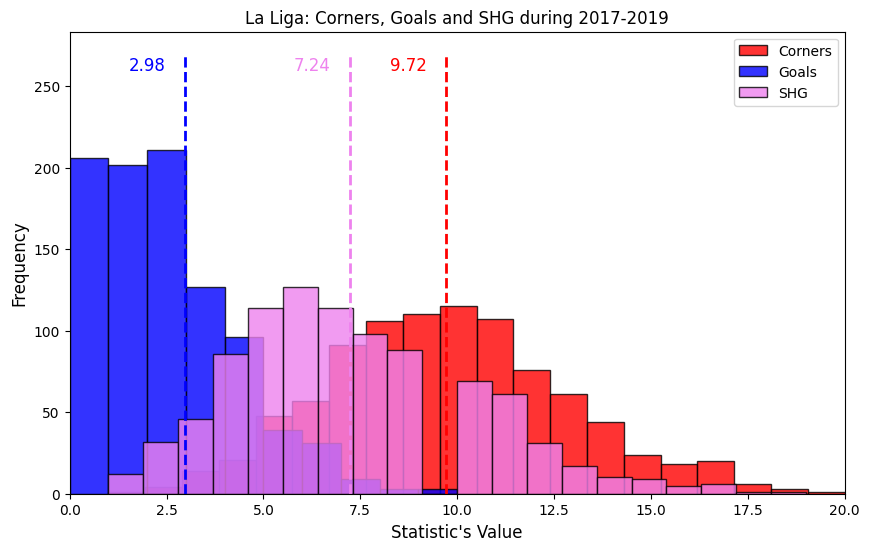

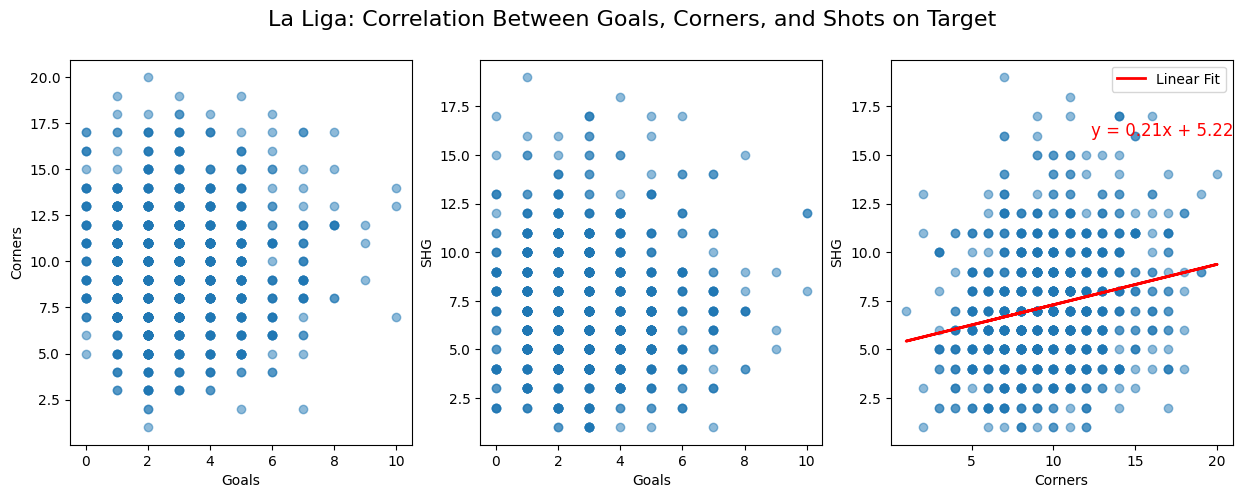

          Corners     Goals       SHG
Corners  1.000000  0.000869  0.216262
Goals    0.000869  1.000000 -0.008756
SHG      0.216262 -0.008756  1.000000


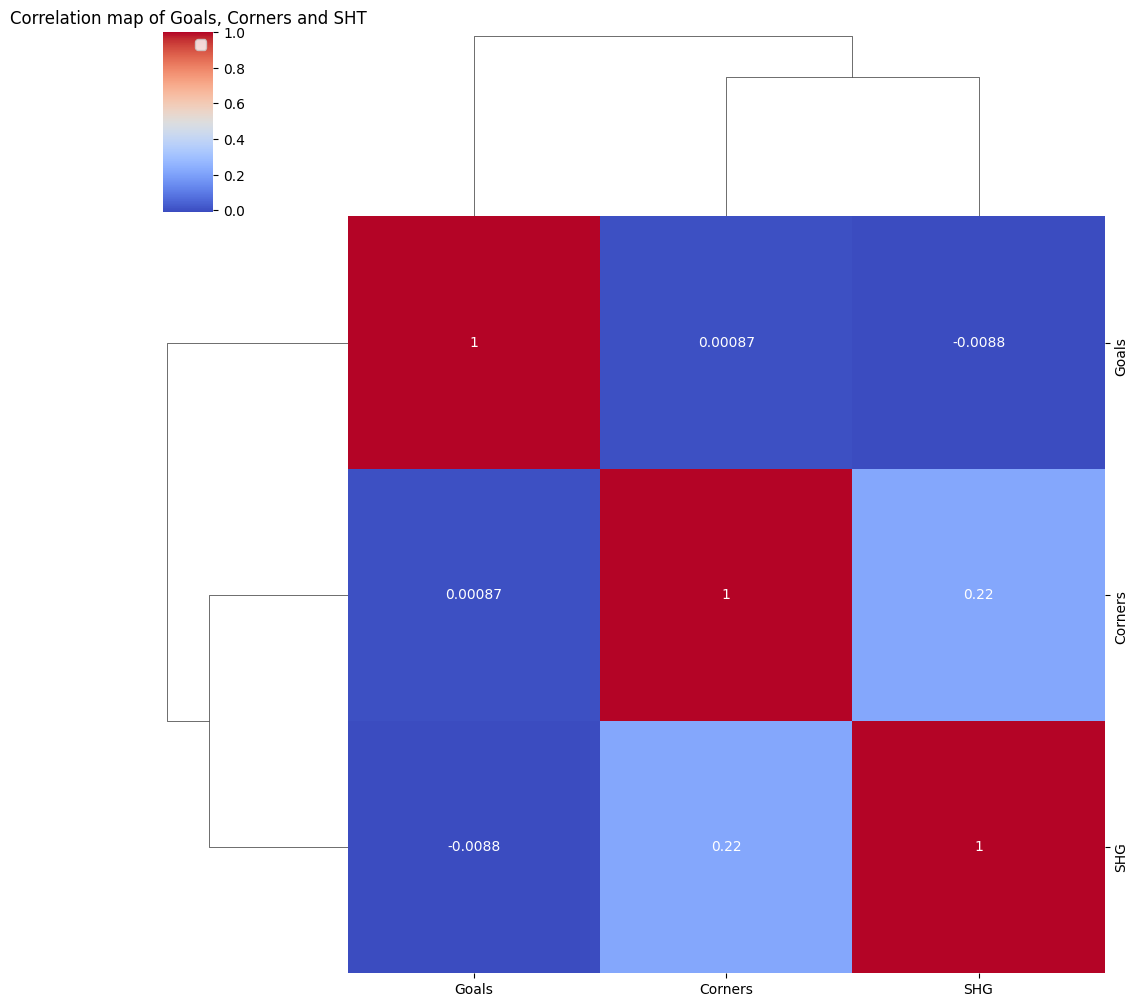

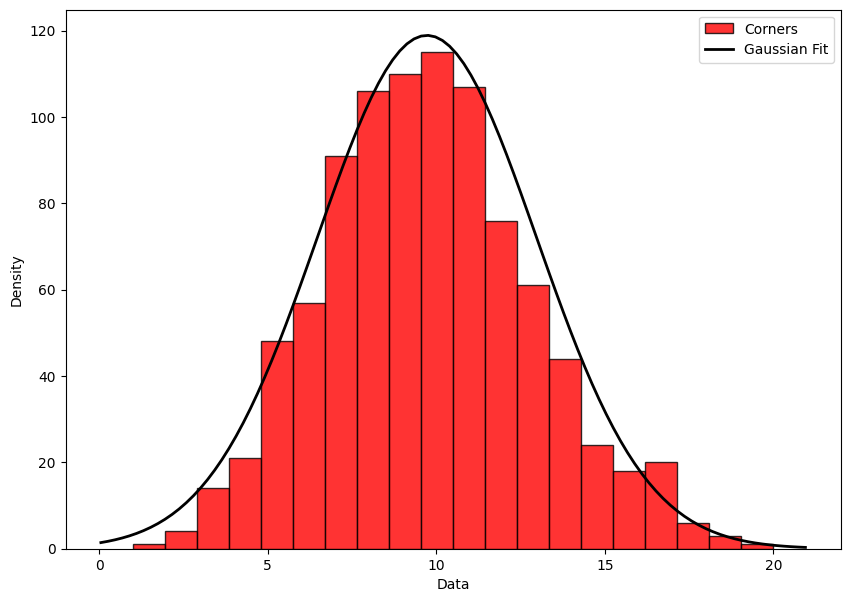

Kolmogorov-Smirnov Test: Statistics=0.078, p-value=0.000
Data does not follow a Gaussian distribution (reject H0).
Shapiro-Wilk Test: Statistics=0.987, p-value=0.000
Data does not follow a Gaussian distribution (reject H0).
Anderson-Darling Test: Statistic=4.569989864315062
At 15.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 10.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 5.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 2.5% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 1.0% level, data does not follow a Gaussian distribution (statistic >= critical value).


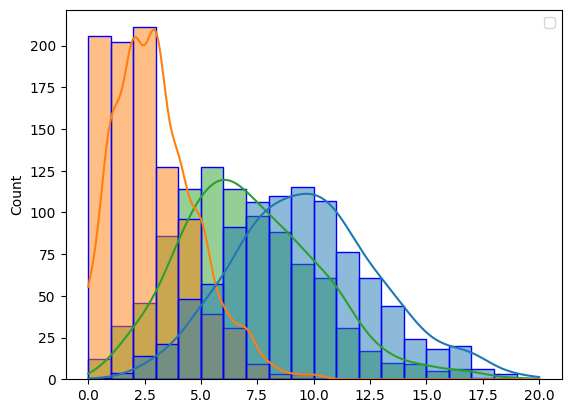


 All the statistics follow a normal distribution with a small skewness and that's the main reason that all normal distribution tests reject the null hypothesis


Skewness of Corners: 0.2567489649432178

Skewness of Goals: 0.7282363108326523

Skewness of SHG: 0.5462121889704737

Anderson-Darling Test Statistic: 1.1575495030720049
Critical Values: [0.574 0.653 0.784 0.914 1.087]
Significance Levels: [15.  10.   5.   2.5  1. ]
The Corners data does not follow a Skew Normal distribution.
Anderson-Darling Test Statistic: 7.5092911315525726
Critical Values: [0.574 0.653 0.784 0.914 1.087]
Significance Levels: [15.  10.   5.   2.5  1. ]
The Goals data does not follow a Skew Normal distribution.
Anderson-Darling Test Statistic: 2.6201900497051156
Critical Values: [0.574 0.653 0.784 0.914 1.087]
Significance Levels: [15.  10.   5.   2.5  1. ]
The SHG data does not follow a Skew Normal distribution.


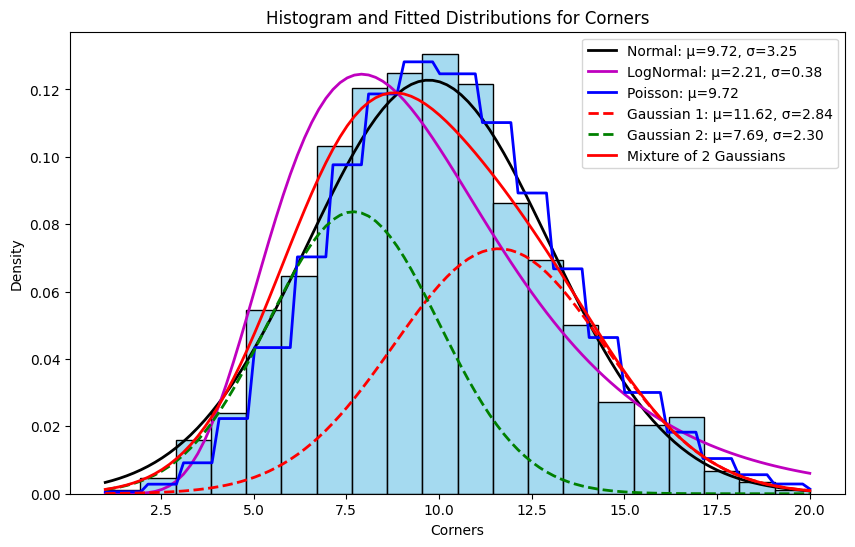

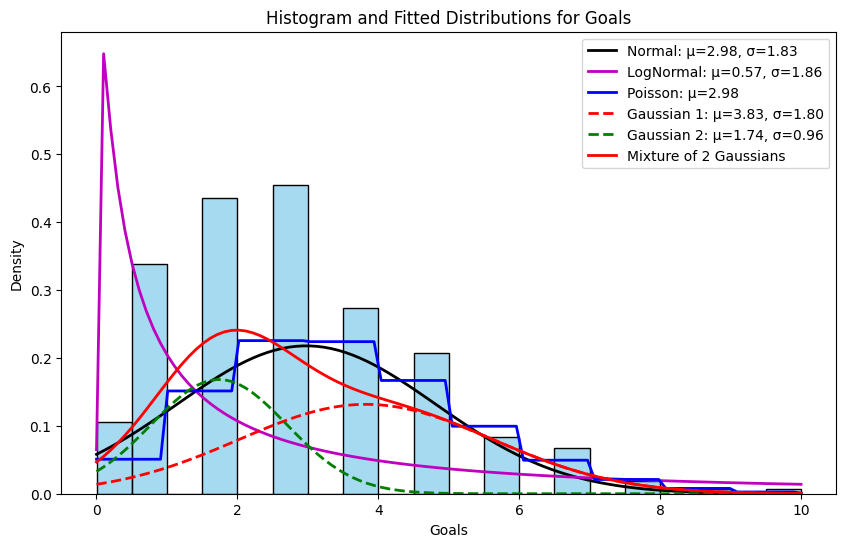

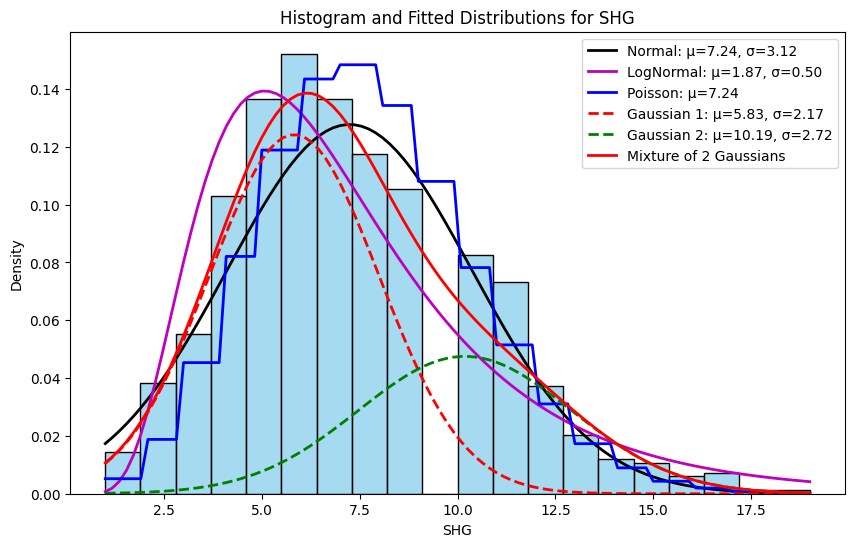

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import gaussian_kde
from scipy.stats import skew
import scipy.stats as stats

# print(df.isnull().sum())

corners2 = df2[(df2['Incident'] == 'CR1') | (df2['Incident'] == 'CR2')]
corners2 = corners2.groupby('RBallID')['Incident'].count().reset_index().rename(columns = {'Incident': 'Corners'})
print(corners2)
goals2 = df2[(df2['Incident'] == 'GOAL1') | (df2['Incident'] == 'GOAL2')]
goals2 = goals2.groupby('RBallID')['Incident'].count().reset_index().rename(columns = {'Incident': 'Goals'})
print(goals2)
shg2 = df2[(df2['Incident'] == 'SHG1') | (df2['Incident'] == 'SHG2')]
shg2 = shg2.groupby('RBallID')['Incident'].count().reset_index().rename(columns = {'Incident': 'SHG'})
print(shg2)
stats_combined2 = pd.merge(corners2, goals2, on = 'RBallID', how = 'outer')
stats_combined2 = pd.merge(stats_combined2, shg2, on = 'RBallID', how = 'outer')
stats_combined2 = stats_combined2.fillna(0)
stats_combined2[['Corners', 'Goals', 'SHG']] = stats_combined2[['Corners', 'Goals', 'SHG']].astype(int)
stats_combined2.set_index('RBallID', inplace = True)
median_value2 = stats_combined2.median()
mean_value2 = stats_combined2.mean()
std_value2 = stats_combined2.std()
var_value2 = stats_combined2.var()
all_stats2 = stats_combined2.describe()

stats_combined2['Goals'] = stats_combined2['Goals'].replace(0,0.001)
stats_combined2['SHG'] = stats_combined2['SHG'].replace(0,0.001)


print('\nThe Median value of Corners, Goals and SHG respectively are:\n',median_value2)
print('\nThe mean value of Corners, Goals and SHG respectively are:\n',mean_value2)
print('\nThe standard deviation value of Corners, Goals and SHG respectively are:\n',std_value2)
print('\nThe variance value of Corners, Goals and SHG respectively are:\n',var_value2)
print(all_stats2)

colors = ['red', 'blue', 'violet']

plt.figure(figsize = (10,6))
plt.hist(stats_combined2['Corners'], bins = 20, alpha = 0.8, label = 'Corners', color = colors[0], edgecolor = 'black')
plt.hist(stats_combined2['Goals'], bins = 10, alpha = 0.8, label = 'Goals', color = colors[1],edgecolor = 'black')
plt.hist(stats_combined2['SHG'], bins = 20, alpha = 0.8, label = 'SHG', color = colors[2],edgecolor = 'black')
# plt.vlines(median_value, ymin = 0, ymax = 270, linewidth = 2, linestyles = '--', color = colors , alpha = 1)
plt.vlines(mean_value2, ymin = 0, ymax = 270, linewidth = 2, linestyles = '--', color = colors , alpha = 1)
plt.text(mean_value2["Corners"]-0.5, 260, f'{mean_value2["Corners"]:.2f}', fontsize=12, color= colors[0], ha='right')
plt.text(mean_value2["Goals"]-0.5, 260, f'{mean_value2["Goals"]:.2f}', fontsize=12, color= colors[1], ha='right')
plt.text(mean_value2["SHG"]-0.5, 260, f'{mean_value2["SHG"]:.2f}', fontsize=12, color= colors[2], ha='right')

plt.xlim(0, 20)
plt.xlabel("Statistic's Value", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('La Liga: Corners, Goals and SHG during 2017-2019')
plt.legend()
plt.show()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
ax[0].scatter(stats_combined2['Goals'], stats_combined2['Corners'], alpha = 0.5)
ax[0].set_xlabel('Goals')
ax[0].set_ylabel('Corners')

ax[1].scatter(stats_combined2['Goals'], stats_combined2['SHG'], alpha = 0.5)
ax[1].set_xlabel('Goals')
ax[1].set_ylabel('SHG')

x = stats_combined2['Corners']
y = stats_combined2['SHG']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
linear_fit = np.poly1d(coefficients)
ax[2].plot(x, linear_fit(x),color='red', linewidth=2, label='Linear Fit')


ax[2].text(21, 16, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12, color='red', ha='right')

ax[2].scatter(stats_combined2['Corners'], stats_combined2['SHG'], alpha = 0.5)
ax[2].set_xlabel('Corners')
ax[2].set_ylabel('SHG')

fig.suptitle('La Liga: Correlation Between Goals, Corners, and Shots on Target', fontsize=16)
plt.legend()
plt.show()

correlation_la_liga = stats_combined2.corr()
print(correlation_la_liga)
sns.clustermap(correlation_la_liga, annot = True, cmap = 'coolwarm')
plt.title('Correlation map of Goals, Corners and SHT')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.hist(stats_combined2['Corners'], bins = 20, alpha = 0.8, label = 'Corners', color = colors[0], edgecolor = 'black')
# Fit a Gaussian distribution to the data
mu, std = norm.fit(stats_combined2['Corners'])

# Plot the Gaussian distribution
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

bin_width = (xmax - xmin) / 20  # assuming 10 bins
p *= len(stats_combined2['Corners']) * bin_width
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()

# Perform K-S test against a normal distribution
stat, p_value = kstest(stats_combined2['Corners'], 'norm', args=(mu, std))
print(f"Kolmogorov-Smirnov Test: Statistics={stat:.3f}, p-value={p_value:.3f}")

if p_value > 0.05:
    print("Data likely follows a Gaussian distribution (fail to reject H0).")
else:
    print("Data does not follow a Gaussian distribution (reject H0).")
stat, p_value = shapiro(stats_combined2['Corners'])

# Shapiro-Wilk test against a normal distribution
print(f"Shapiro-Wilk Test: Statistics={stat:.3f}, p-value={p_value:.3f}")

if p_value > 0.05:
    print("Data likely follows a Gaussian distribution (fail to reject H0).")
else:
    print("Data does not follow a Gaussian distribution (reject H0).")

# Anderson test against a normal distribution
result1 = anderson(stats_combined2['Corners'], dist='norm')
print(f"Anderson-Darling Test: Statistic={result1.statistic}")

for i in range(len(result1.critical_values)):
    sl, cv = result1.significance_level[i], result1.critical_values[i]
    if result1.statistic < cv:
        print(f"At {sl}% level, data likely follows a Gaussian distribution (statistic < critical value).")
    else:
        print(f"At {sl}% level, data does not follow a Gaussian distribution (statistic >= critical value).")


sns.histplot(stats_combined2, kde = True, edgecolor = 'blue', bins = 20)
plt.legend()
plt.show()
skewness2 = skew(stats_combined2)

print(f"\n All the statistics follow a normal distribution with a small skewness and that's the main reason that all normal distribution tests reject the null hypothesis\n")
print(f"\nSkewness of Corners: {skewness2[0]}")
print(f"\nSkewness of Goals: {skewness2[1]}")
print(f"\nSkewness of SHG: {skewness2[2]}\n")

#---------------------------------------------------------------------------------------------------
# Assuming `your_data` is your dataset (a 1D numpy array or pandas Series)
corner_data2 = np.array(stats_combined2['Corners'])  # Replace with your actual data

# 1. Fit a Skew Normal distribution to your data
shape, loc, scale = stats.skewnorm.fit(corner_data2)

# 2. Generate data from the fitted Skew Normal distribution
fitted_data2 = stats.skewnorm.rvs(shape, loc=loc, scale=scale, size=len(corner_data2))

# 3. Perform the Anderson-Darling test on the generated data
ad_stat, critical_values, significance_level = stats.anderson(fitted_data2, dist='norm')

# 4. Output the results
print(f"Anderson-Darling Test Statistic: {ad_stat}")
print("Critical Values:", critical_values)
print("Significance Levels:", significance_level)

# Compare the AD test statistic with the critical values to determine fit
if ad_stat < critical_values[2]:  # Usually, the third value corresponds to 5% significance level
    print("The Corners data follows a Skew Normal distribution.")
else:
    print("The Corners data does not follow a Skew Normal distribution.")


#---------------------------------------------------------------------------------------------------
# Assuming `your_data` is your dataset (a 1D numpy array or pandas Series)
corner_data2 = np.array(stats_combined2['Goals'])  # Replace with your actual data

# 1. Fit a Skew Normal distribution to your data
shape, loc, scale = stats.skewnorm.fit(corner_data2)

# 2. Generate data from the fitted Skew Normal distribution
fitted_data2 = stats.skewnorm.rvs(shape, loc=loc, scale=scale, size=len(corner_data2))

# 3. Perform the Anderson-Darling test on the generated data
ad_stat, critical_values, significance_level = stats.anderson(fitted_data2, dist='norm')

# 4. Output the results
print(f"Anderson-Darling Test Statistic: {ad_stat}")
print("Critical Values:", critical_values)
print("Significance Levels:", significance_level)

# Compare the AD test statistic with the critical values to determine fit
if ad_stat < critical_values[2]:  # Usually, the third value corresponds to 5% significance level
    print("The Goals data follows a Skew Normal distribution.")
else:
    print("The Goals data does not follow a Skew Normal distribution.")

#---------------------------------------------------------------------------------------------------

# Assuming `your_data` is your dataset (a 1D numpy array or pandas Series)
corner_data2 = np.array(stats_combined2['SHG'])  # Replace with your actual data

# 1. Fit a Skew Normal distribution to your data
shape, loc, scale = stats.skewnorm.fit(corner_data2)

# 2. Generate data from the fitted Skew Normal distribution
fitted_data2 = stats.skewnorm.rvs(shape, loc=loc, scale=scale, size=len(corner_data2))

# 3. Perform the Anderson-Darling test on the generated data
ad_stat, critical_values, significance_level = stats.anderson(fitted_data2, dist='norm')

# 4. Output the results
print(f"Anderson-Darling Test Statistic: {ad_stat}")
print("Critical Values:", critical_values)
print("Significance Levels:", significance_level)

# Compare the AD test statistic with the critical values to determine fit
if ad_stat < critical_values[2]:  # Usually, the third value corresponds to 5% significance level
    print("The SHG data follows a Skew Normal distribution.")
else:
    print("The SHG data does not follow a Skew Normal distribution.")


for column in ['Corners', 'Goals', 'SHG']:
    plot_hist_with_distributions(stats_combined2, column)

In [15]:
# Pearson Correlation
pearson_corr2 = stats_combined2.corr(method='pearson')
print("Pearson Correlation:\n", pearson_corr2)

# Spearman Correlation
spearman_corr2 = stats_combined2.corr(method='spearman')
print("\nSpearman Correlation:\n", spearman_corr2)

# Kendall Correlation
kendall_corr2 = stats_combined2.corr(method='kendall')
print("\nKendall Correlation:\n", kendall_corr2)

Pearson Correlation:
           Corners     Goals       SHG
Corners  1.000000  0.000858  0.216262
Goals    0.000858  1.000000 -0.008758
SHG      0.216262 -0.008758  1.000000

Spearman Correlation:
           Corners     Goals       SHG
Corners  1.000000 -0.014351  0.206618
Goals   -0.014351  1.000000 -0.026935
SHG      0.206618 -0.026935  1.000000

Kendall Correlation:
           Corners     Goals       SHG
Corners  1.000000 -0.010953  0.152055
Goals   -0.010953  1.000000 -0.019724
SHG      0.152055 -0.019724  1.000000


In [16]:
# Perform K-S test against a normal distribution
stat, p_value = kstest(stats_combined2['Corners'], 'norm', args=(mu, std))
print(f"Kolmogorov-Smirnov Test: Statistics={stat:.3f}, p-value={p_value:.3f}")

if p_value > 0.05:
    print("Data likely follows a Gaussian distribution (fail to reject H0).")
else:
    print("Data does not follow a Gaussian distribution (reject H0).")
stat, p_value = shapiro(stats_combined2['Corners'])

# Shapiro-Wilk test against a normal distribution
print(f"Shapiro-Wilk Test: Statistics={stat:.3f}, p-value={p_value:.3f}")

if p_value > 0.05:
    print("Data likely follows a Gaussian distribution (fail to reject H0).")
else:
    print("Data does not follow a Gaussian distribution (reject H0).")

# Anderson test against a normal distribution
result = anderson(stats_combined2['Corners'], dist='norm')
print(f"Anderson-Darling Test: Statistic={result.statistic}")

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}% level, data likely follows a Gaussian distribution (statistic < critical value).")
    else:
        print(f"At {sl}% level, data does not follow a Gaussian distribution (statistic >= critical value).")

Kolmogorov-Smirnov Test: Statistics=0.078, p-value=0.000
Data does not follow a Gaussian distribution (reject H0).
Shapiro-Wilk Test: Statistics=0.987, p-value=0.000
Data does not follow a Gaussian distribution (reject H0).
Anderson-Darling Test: Statistic=4.569989864315062
At 15.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 10.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 5.0% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 2.5% level, data does not follow a Gaussian distribution (statistic >= critical value).
At 1.0% level, data does not follow a Gaussian distribution (statistic >= critical value).


# **Compare the chosen statistics across the three leagues and over the three seasons, highlighting any significant differences and trends.**

In [17]:
df['year'] = pd.to_datetime(df['Timestamp']).dt.year
df1['year'] = pd.to_datetime(df1['Timestamp']).dt.year
df2['year'] = pd.to_datetime(df2['Timestamp']).dt.year

In [18]:
def grouping_id_year(df, incidents, new_col_name):
  return(
      df[df['Incident'].isin(incidents)].groupby(['RBallID', 'year']).count().reset_index().rename(columns = {'Incident': new_col_name})
  )

# **PREMIER LEAGUE**

In [19]:
fouls = grouping_id_year(df, ['F1', 'F2'], 'Fouls')
offsides = grouping_id_year(df, ['O1', 'O2'], 'Offsides')
corners = grouping_id_year(df, ['CR1', 'CR2'], 'Corners')
goals = grouping_id_year(df, ['GOAL1', 'GOAL2'], 'Goals')
shg = grouping_id_year(df, ['SHG1', 'SHG2'], 'SHG')
fouls = fouls.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
offsides = offsides.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
corners = corners.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
goals = goals.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
shg = shg.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
premier_league = pd.merge(fouls, offsides, on=['RBallID', 'year'], how='outer')
premier_league = pd.merge(premier_league, corners, on=['RBallID', 'year'], how='outer')
premier_league = pd.merge(premier_league, goals, on=['RBallID', 'year'], how='outer')
premier_league = pd.merge(premier_league, shg, on=['RBallID', 'year'], how='outer')
premier_league.fillna(0, inplace=True)
premier_league[['Fouls', 'Offsides','Corners', 'Goals', 'SHG']] = premier_league[['Fouls', 'Offsides','Corners', 'Goals', 'SHG']].astype(int)
premier_league.set_index(['RBallID', 'year'], inplace=True)

# **LEAGUE 1**

In [20]:
fouls = grouping_id_year(df1, ['F1', 'F2'], 'Fouls')
offsides = grouping_id_year(df1, ['O1', 'O2'], 'Offsides')
corners = grouping_id_year(df1, ['CR1', 'CR2'], 'Corners')
goals = grouping_id_year(df1, ['GOAL1', 'GOAL2'], 'Goals')
shg = grouping_id_year(df1, ['SHG1', 'SHG2'], 'SHG')
fouls = fouls.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
offsides = offsides.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
corners = corners.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
goals = goals.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
shg = shg.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
league_1 = pd.merge(fouls, offsides, on=['RBallID', 'year'], how='outer')
league_1 = pd.merge(league_1, corners, on=['RBallID', 'year'], how='outer')
league_1 = pd.merge(league_1, goals, on=['RBallID', 'year'], how='outer')
league_1 = pd.merge(league_1, shg, on=['RBallID', 'year'], how='outer')
league_1.fillna(0, inplace=True)
league_1[['Fouls', 'Offsides','Corners', 'Goals', 'SHG']] = league_1[['Fouls', 'Offsides','Corners', 'Goals', 'SHG']].astype(int)
league_1.set_index(['RBallID', 'year'], inplace=True)

# **LA LIGA**

In [21]:
fouls = grouping_id_year(df2, ['F1', 'F2'], 'Fouls')
offsides = grouping_id_year(df2, ['O1', 'O2'], 'Offsides')
corners = grouping_id_year(df2, ['CR1', 'CR2'], 'Corners')
goals = grouping_id_year(df2, ['GOAL1', 'GOAL2'], 'Goals')
shg = grouping_id_year(df2, ['SHG1', 'SHG2'], 'SHG')
fouls = fouls.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
offsides = offsides.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
corners = corners.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
goals = goals.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
shg = shg.drop(columns=['Timestamp', 'HomeTeam', 'Minute', 'AwayTeam', 'IncidentNumber'], errors='ignore')
la_liga = pd.merge(fouls, offsides, on=['RBallID', 'year'], how='outer')
la_liga = pd.merge(la_liga, corners, on=['RBallID', 'year'], how='outer')
la_liga = pd.merge(la_liga, goals, on=['RBallID', 'year'], how='outer')
la_liga = pd.merge(la_liga, shg, on=['RBallID', 'year'], how='outer')
la_liga.fillna(0, inplace=True)
la_liga[['Fouls', 'Offsides','Corners', 'Goals', 'SHG']] = la_liga[['Fouls', 'Offsides','Corners', 'Goals', 'SHG']].astype(int)
la_liga.set_index(['RBallID', 'year'], inplace=True)

# **7. Temporal Analysis: Study how each league changes over the three seasons. Identify trends, patterns, and significant changes in the incidents over time.**

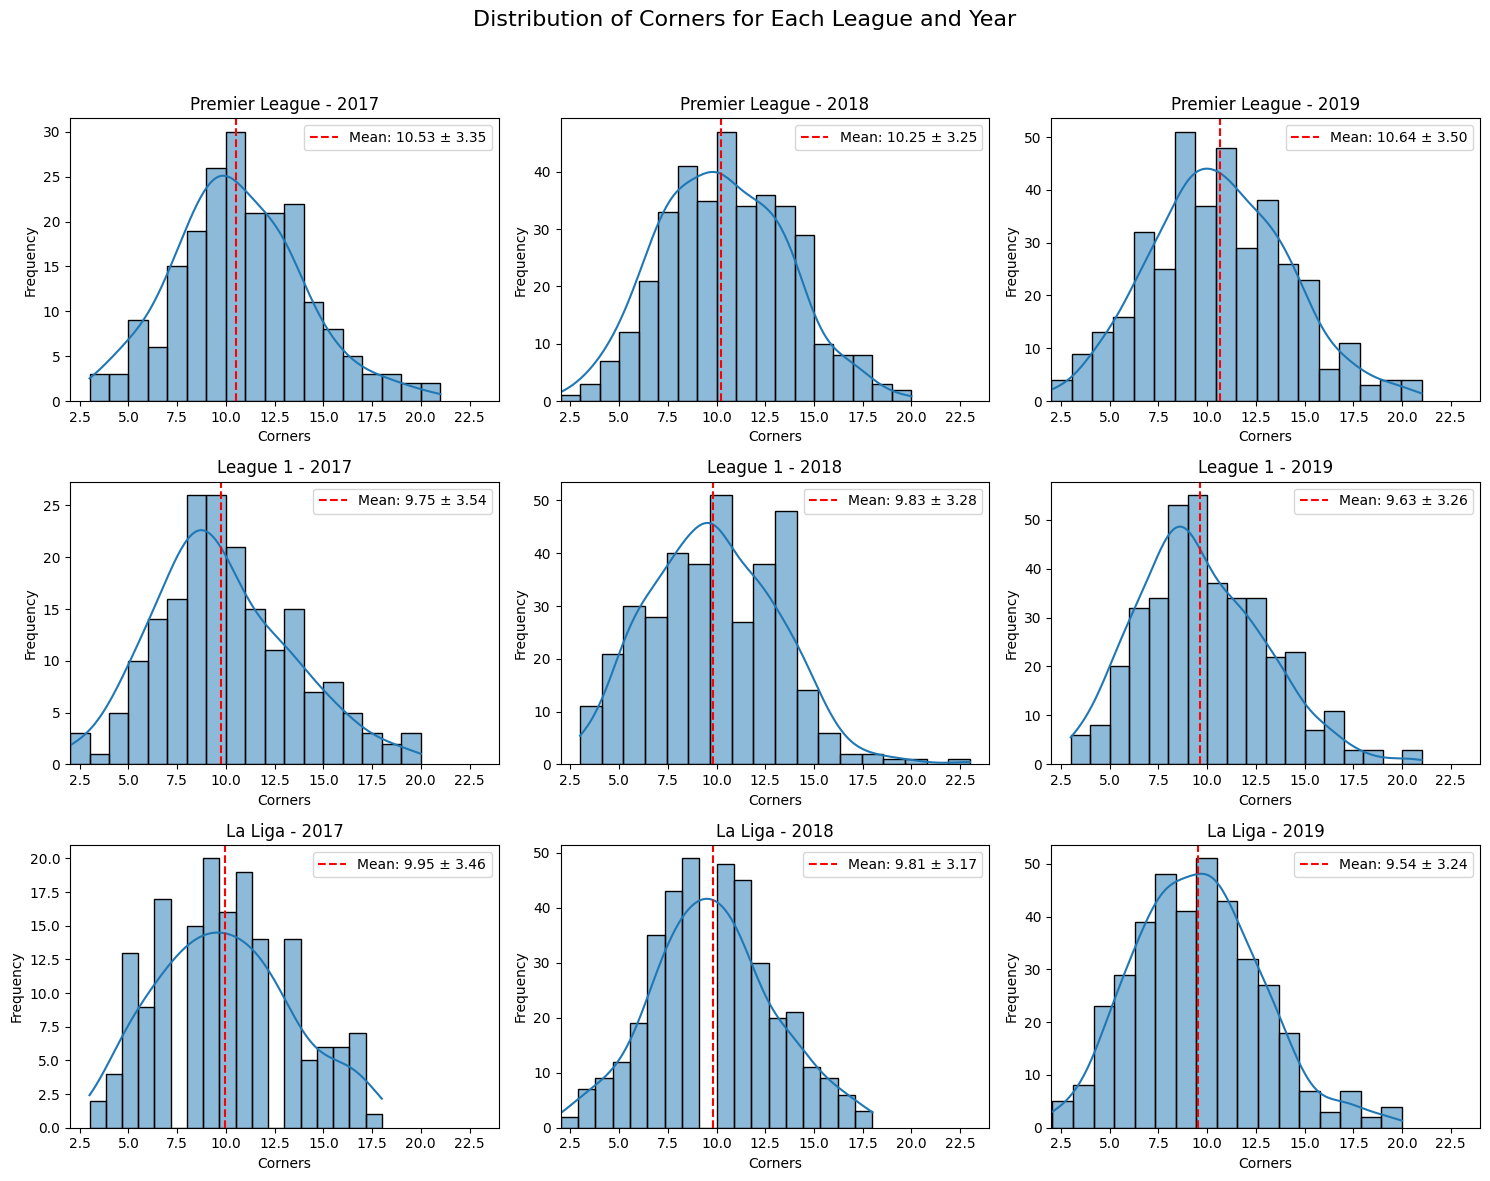

Columns in Premier League: ['Fouls', 'Offsides', 'Corners', 'Goals', 'SHG']
Columns in League 1: ['Fouls', 'Offsides', 'Corners', 'Goals', 'SHG']
Columns in La Liga: ['Fouls', 'Offsides', 'Corners', 'Goals', 'SHG']


In [22]:
years = [2017, 2018, 2019]
leagues = [premier_league, league_1, la_liga]
league_names = ['Premier League', 'League 1', 'La Liga']

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Distribution of Corners for Each League and Year', fontsize=16)

for row, league in enumerate(leagues):
    for col, year in enumerate(years):
        data = league.xs(year, level='year')['Corners']
        corner_mean_value = data.mean()
        corner_std = data.std()
        sns.histplot(league.xs(year, level='year')['Corners'], kde=True, ax=ax[row, col], edgecolor='black', bins=18)
        ax[row, col].axvline(corner_mean_value, color='red', linestyle='--', label=f'Mean: {corner_mean_value:.2f} ± {corner_std:.2f}')
        ax[row, col].set_title(f'{league_names[row]} - {year}')
        ax[row, col].set_xlabel('Corners')
        ax[row, col].set_ylabel('Frequency')
        ax[row, col].set_xlim((2,24))
        ax[row, col].legend()



plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

for league, league_name in zip(leagues, league_names):
    print(f"Columns in {league_name}: {league.columns.tolist()}")


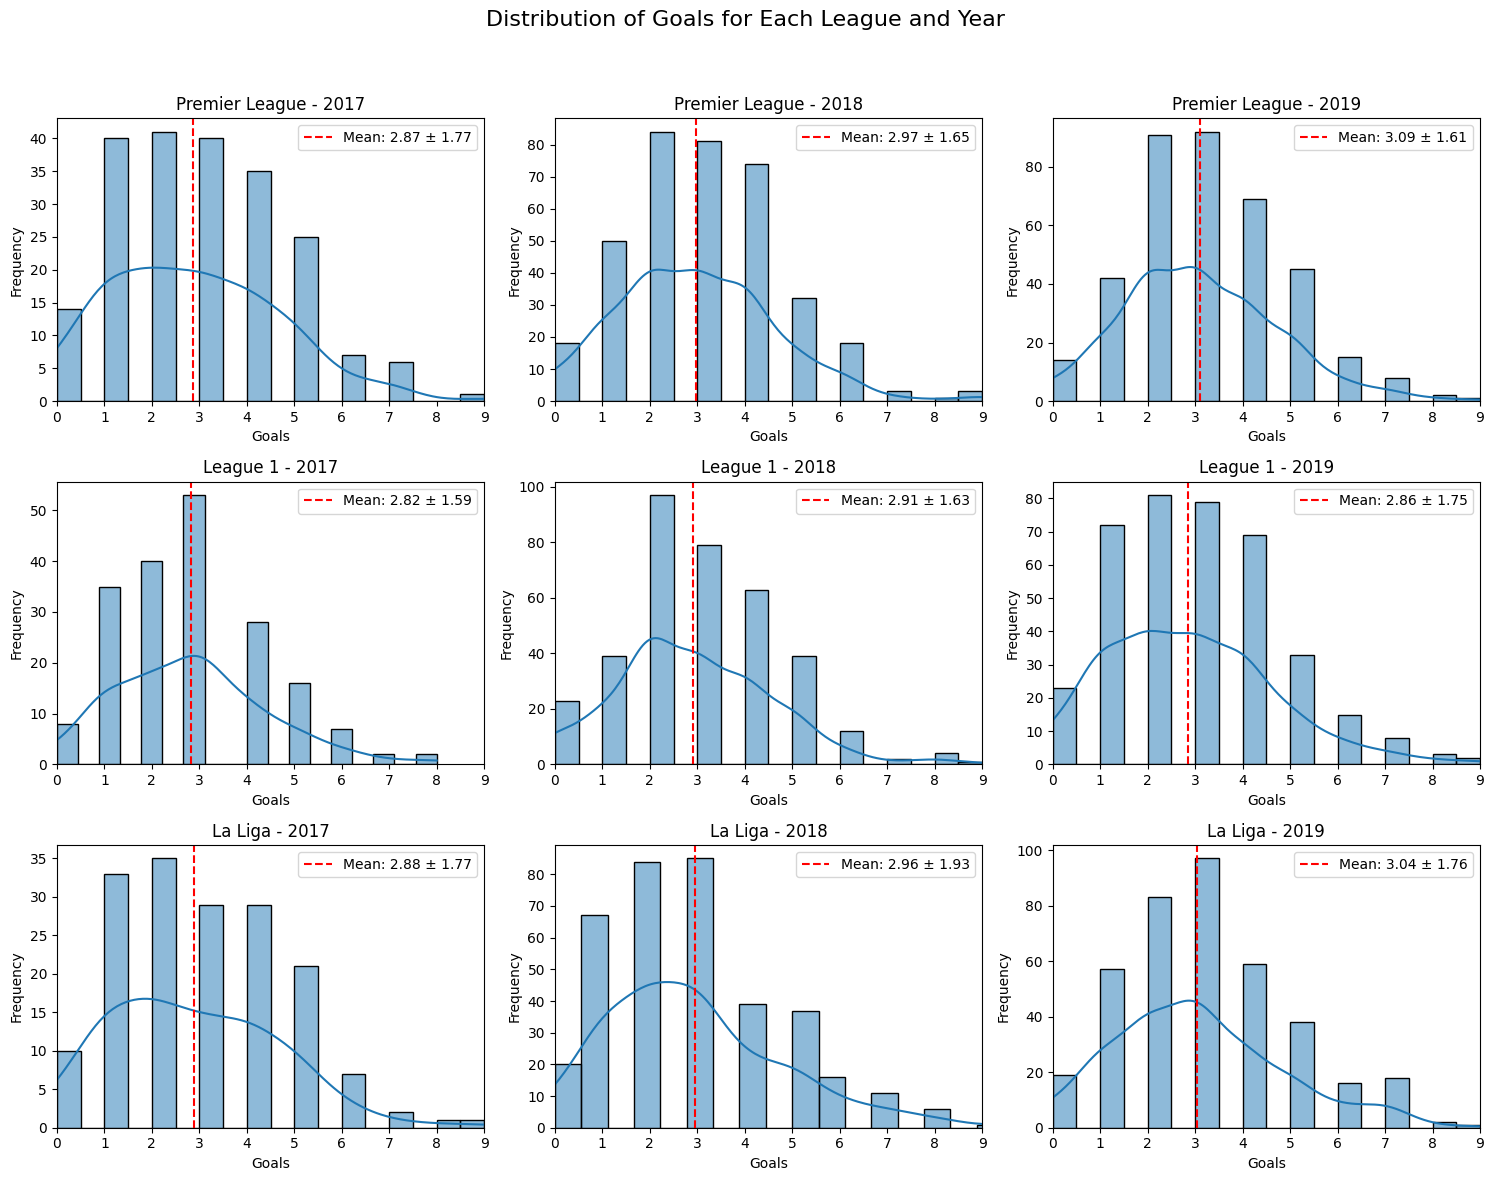

In [23]:
years = [2017, 2018, 2019]
leagues = [premier_league, league_1, la_liga]
league_names = ['Premier League', 'League 1', 'La Liga']

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Distribution of Goals for Each League and Year', fontsize=16)

for row, league in enumerate(leagues):
    for col, year in enumerate(years):
        data = league.xs(year, level='year')['Goals']
        goal_mean_value = data.mean()
        goal_std = data.std()
        sns.histplot(league.xs(year, level='year')['Goals'], kde=True, ax=ax[row, col], edgecolor='black', bins=18)
        ax[row, col].axvline(goal_mean_value, color='red', linestyle='--', label=f'Mean: {goal_mean_value:.2f} ± {goal_std:.2f}')
        ax[row, col].set_title(f'{league_names[row]} - {year}')
        ax[row, col].set_xlabel('Goals')
        ax[row, col].set_ylabel('Frequency')
        ax[row, col].set_xlim((0,9))
        ax[row, col].legend()



plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

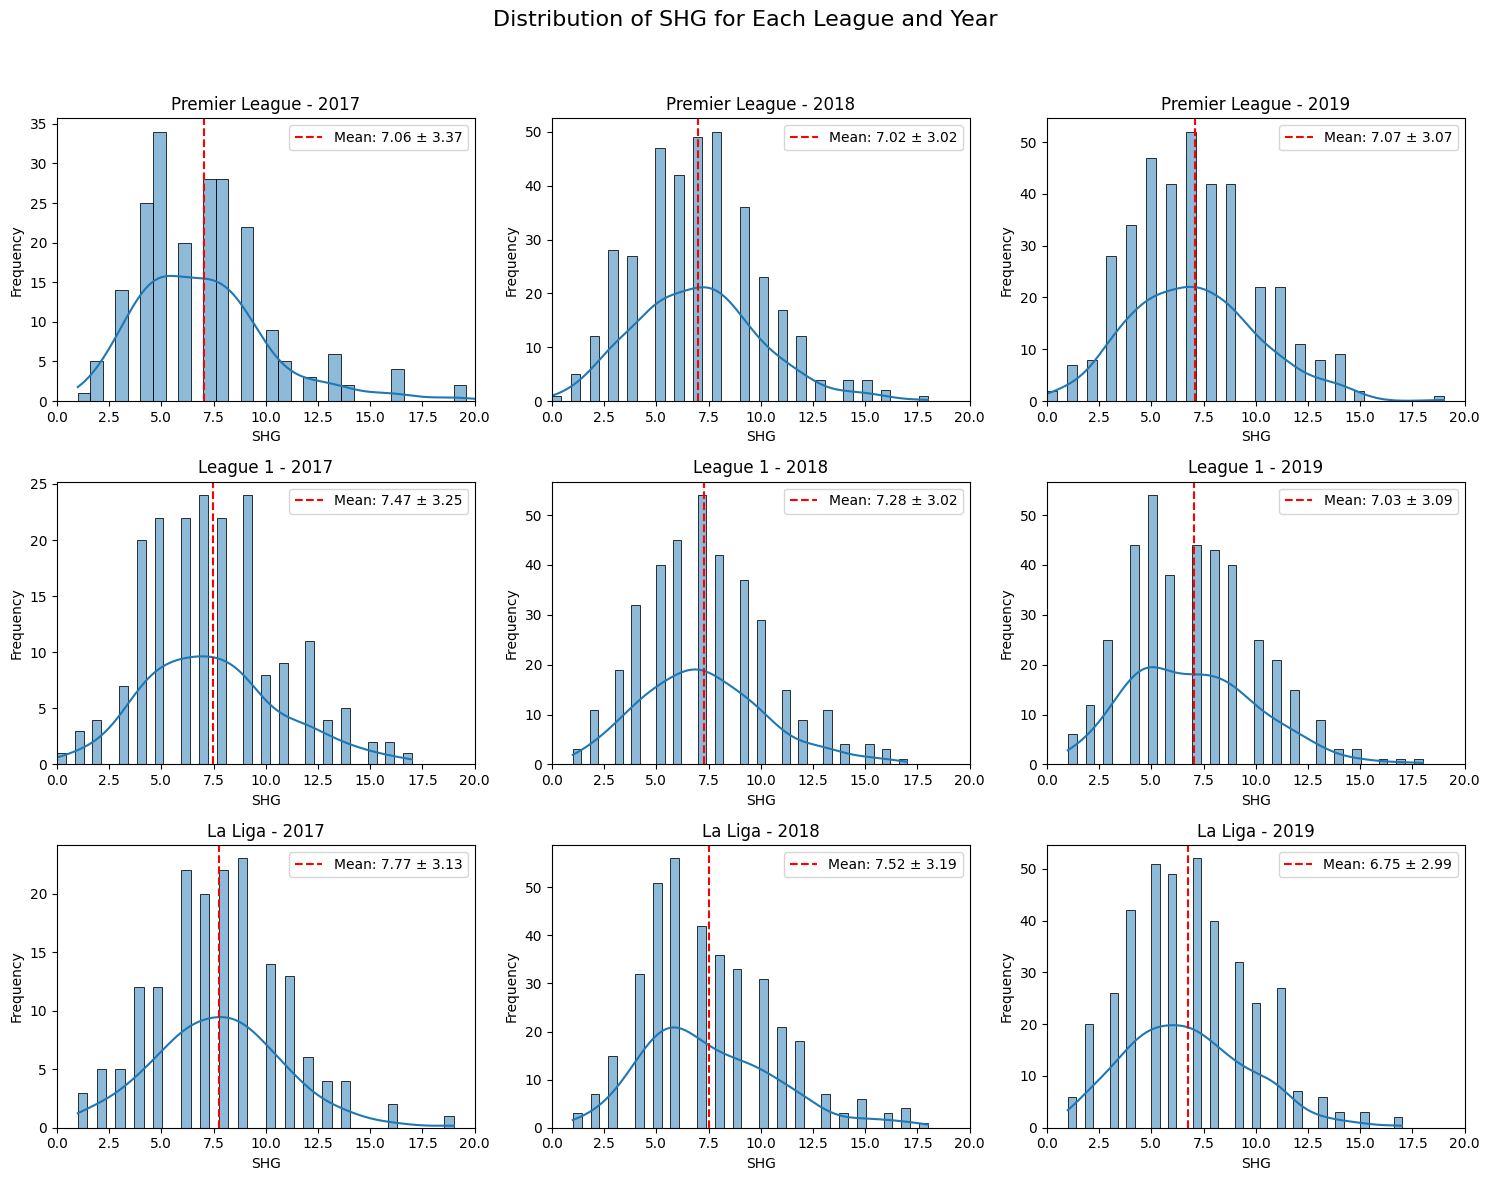

In [24]:
years = [2017, 2018, 2019]
leagues = [premier_league, league_1, la_liga]
league_names = ['Premier League', 'League 1', 'La Liga']

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Distribution of SHG for Each League and Year', fontsize=16)

for row, league in enumerate(leagues):
    for col, year in enumerate(years):
        data = league.xs(year, level='year')['SHG']
        SHG_mean_value = data.mean()
        SHG_std = data.std()
        sns.histplot(league.xs(year, level='year')['SHG'], kde=True, ax=ax[row, col], edgecolor='black', bins=40)
        ax[row, col].axvline(SHG_mean_value, color='red', linestyle='--', label=f'Mean: {SHG_mean_value:.2f} ± {SHG_std:.2f}')
        ax[row, col].set_title(f'{league_names[row]} - {year}')
        ax[row, col].set_xlabel('SHG')
        ax[row, col].set_ylabel('Frequency')
        ax[row, col].set_xlim((0,20))
        ax[row, col].legend()



plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

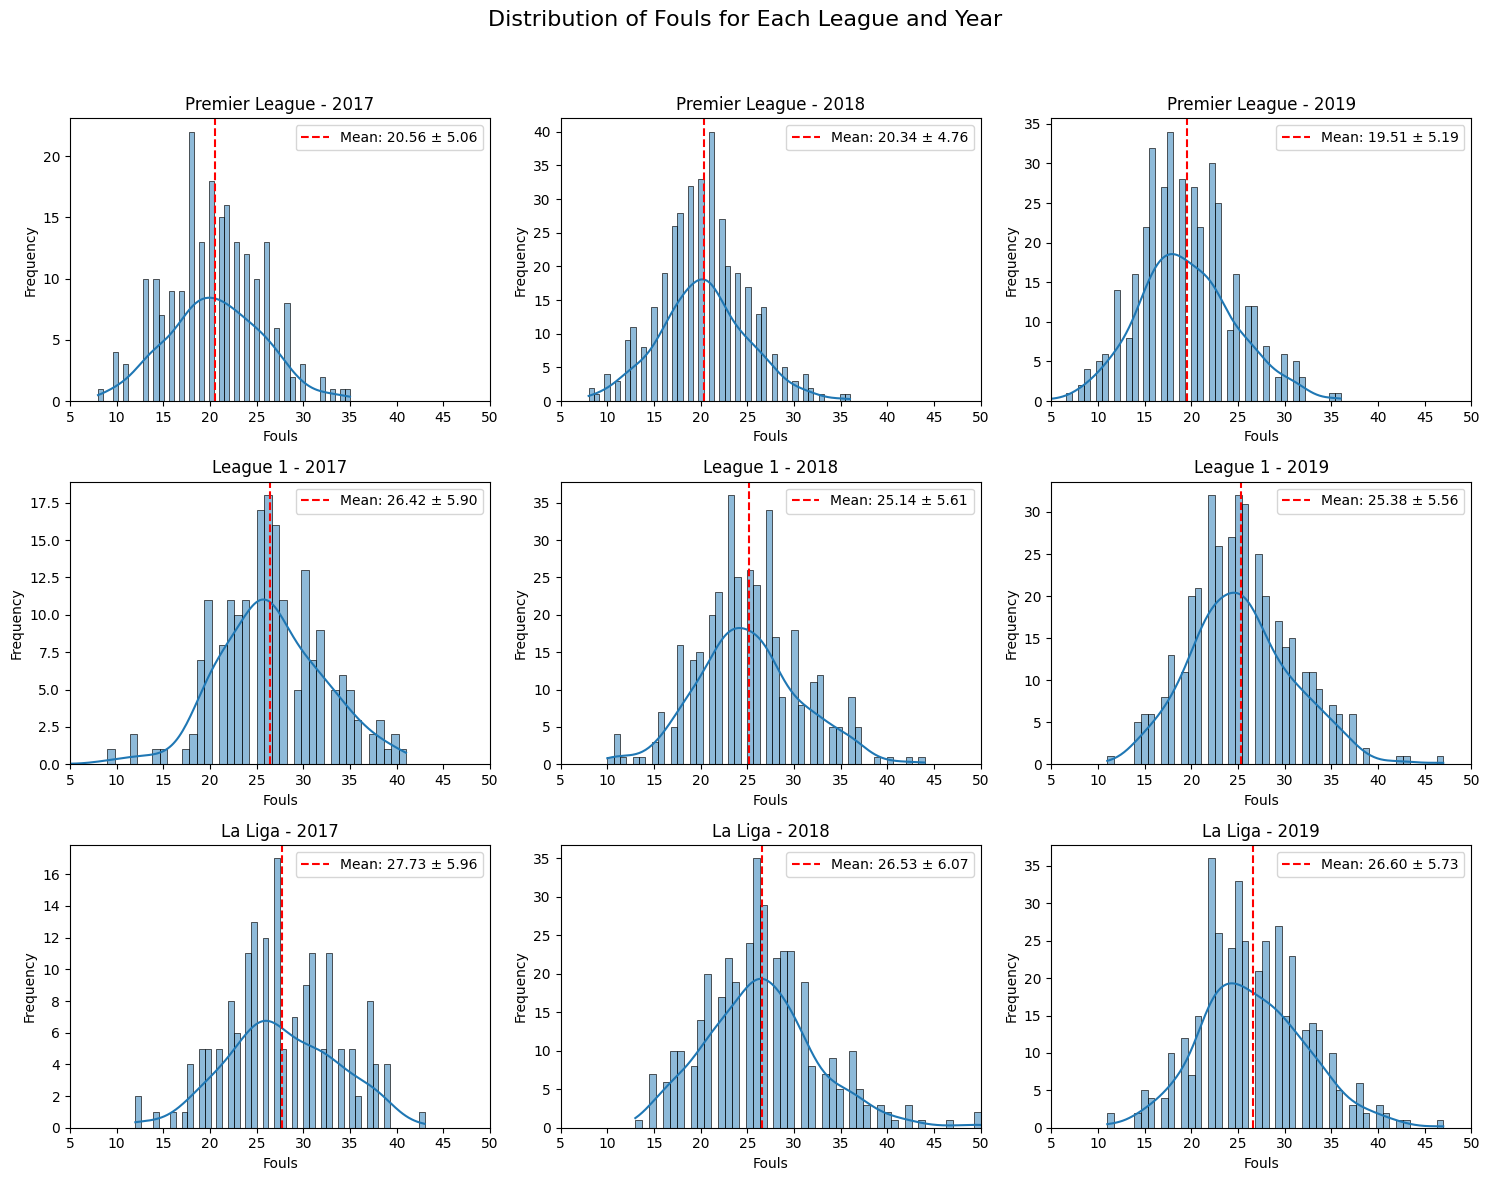

In [25]:
years = [2017, 2018, 2019]
leagues = [premier_league, league_1, la_liga]
league_names = ['Premier League', 'League 1', 'La Liga']

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Distribution of Fouls for Each League and Year', fontsize=16)

for row, league in enumerate(leagues):
    for col, year in enumerate(years):
        data = league.xs(year, level='year')['Fouls']
        fouls_mean_value = data.mean()
        fouls_std = data.std()
        sns.histplot(league.xs(year, level='year')['Fouls'], kde=True, ax=ax[row, col], edgecolor='black', bins=50)
        ax[row, col].axvline(fouls_mean_value, color='red', linestyle='--', label=f'Mean: {fouls_mean_value:.2f} ± {fouls_std:.2f}')
        ax[row, col].set_title(f'{league_names[row]} - {year}')
        ax[row, col].set_xlabel('Fouls')
        ax[row, col].set_ylabel('Frequency')
        ax[row, col].set_xlim((5,50))
        ax[row, col].legend()



plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

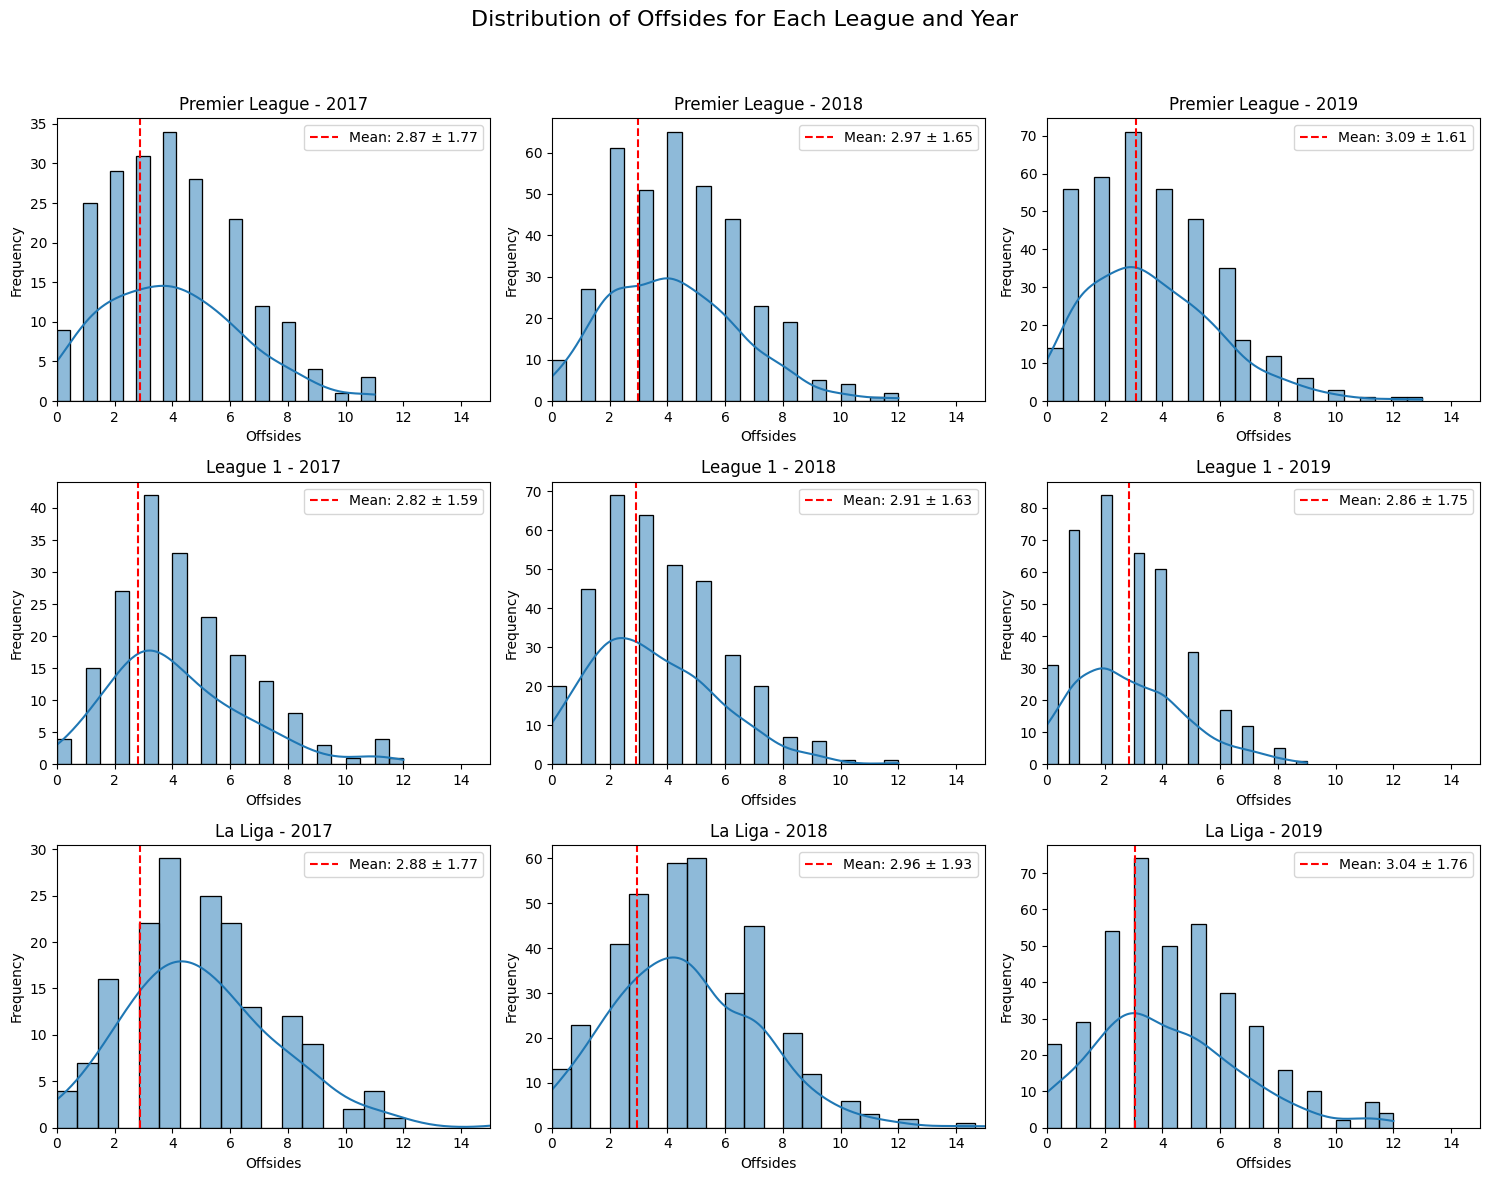

In [26]:
years = [2017, 2018, 2019]
leagues = [premier_league, league_1, la_liga]
league_names = ['Premier League', 'League 1', 'La Liga']

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Distribution of Offsides for Each League and Year', fontsize=16)

for row, league in enumerate(leagues):
    for col, year in enumerate(years):
        data = league.xs(year, level='year')['Goals']
        offside_mean_value = data.mean()
        offside_std = data.std()
        sns.histplot(league.xs(year, level='year')['Offsides'], kde=True, ax=ax[row, col], edgecolor='black', bins=24)
        ax[row, col].axvline(offside_mean_value, color='red', linestyle='--', label=f'Mean: {offside_mean_value:.2f} ± {offside_std:.2f}')
        ax[row, col].set_title(f'{league_names[row]} - {year}')
        ax[row, col].set_xlabel('Offsides')
        ax[row, col].set_ylabel('Frequency')
        ax[row, col].set_xlim((0,15))
        ax[row, col].legend()



plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


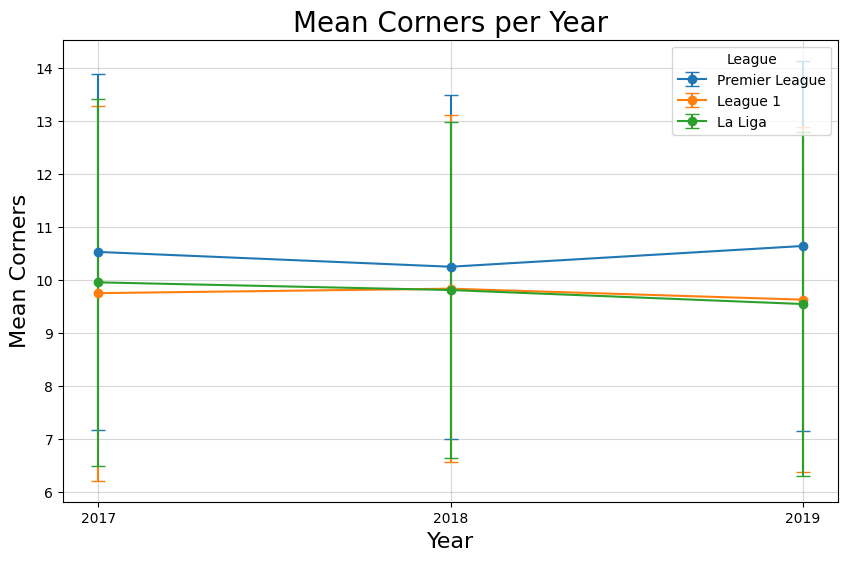

In [27]:
years = [2017, 2018, 2019]
leagues = [premier_league, league_1, la_liga]
league_names = ['Premier League', 'League 1', 'La Liga']
mean_std_list = []

for league, name in zip(leagues, league_names):
    for year in years:
        data = league.xs(year, level='year')['Corners']
        mean_value = data.mean()
        std_value = data.std()
        mean_std_list.append({'Year': year, 'League': name, 'Mean': mean_value, 'Std': std_value})

mean_std_data = pd.DataFrame(mean_std_list)
mean_std_data['Year'] = mean_std_data['Year'].astype(int)
mean_std_data_pivot = mean_std_data.pivot(index='Year', columns='League', values=['Mean', 'Std'])


plt.figure(figsize=(10, 6))

for league_name in league_names:
    plt.errorbar(mean_std_data_pivot.index,
                 mean_std_data_pivot['Mean'][league_name],
                 yerr=mean_std_data_pivot['Std'][league_name],
                 label=league_name,
                 marker='o',
                 capsize=5)

plt.title('Mean Corners per Year', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Mean Corners', fontsize = 16)
plt.xticks(years)
plt.legend(title='League')
plt.grid(True, alpha = 0.5)
plt.show()

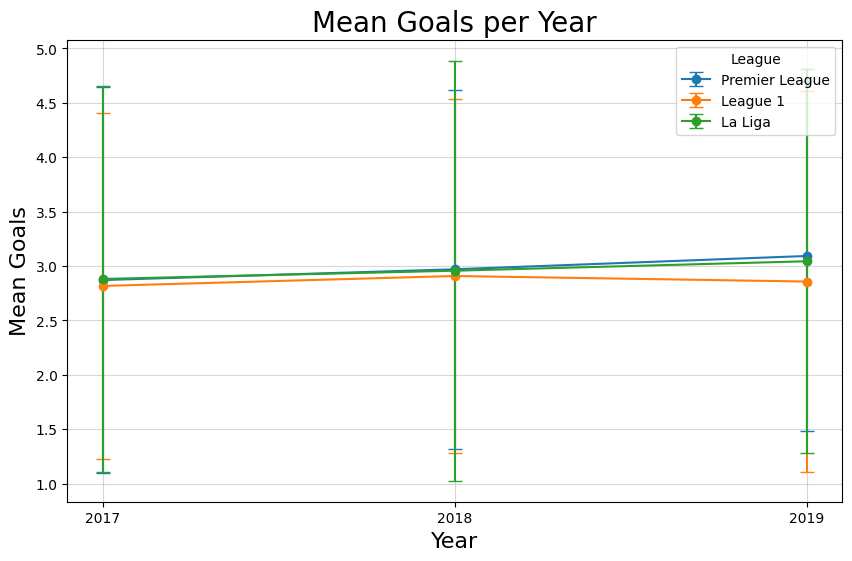

In [28]:
years = [2017, 2018, 2019]
leagues = [premier_league, league_1, la_liga]
league_names = ['Premier League', 'League 1', 'La Liga']
mean_std_list = []

for league, name in zip(leagues, league_names):
    for year in years:
        data = league.xs(year, level='year')['Goals']
        mean_value = data.mean()
        std_value = data.std()
        mean_std_list.append({'Year': year, 'League': name, 'Mean': mean_value, 'Std': std_value})

mean_std_data = pd.DataFrame(mean_std_list)
mean_std_data['Year'] = mean_std_data['Year'].astype(int)
mean_std_data_pivot = mean_std_data.pivot(index='Year', columns='League', values=['Mean', 'Std'])


plt.figure(figsize=(10, 6))

for league_name in league_names:
    plt.errorbar(mean_std_data_pivot.index,
                 mean_std_data_pivot['Mean'][league_name],
                 yerr=mean_std_data_pivot['Std'][league_name],
                 label=league_name,
                 marker='o',
                 capsize=5)

plt.title('Mean Goals per Year', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Mean Goals', fontsize = 16)
plt.xticks(years)
plt.legend(title='League')
plt.grid(True, alpha = 0.5)
plt.show()

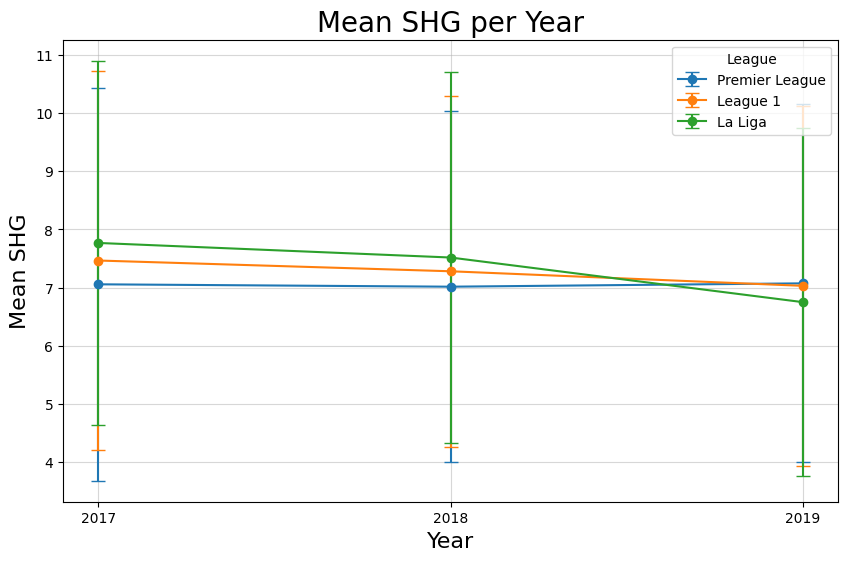

In [29]:
years = [2017, 2018, 2019]
leagues = [premier_league, league_1, la_liga]
league_names = ['Premier League', 'League 1', 'La Liga']
mean_std_list = []

for league, name in zip(leagues, league_names):
    for year in years:
        data = league.xs(year, level='year')['SHG']
        mean_value = data.mean()
        std_value = data.std()
        mean_std_list.append({'Year': year, 'League': name, 'Mean': mean_value, 'Std': std_value})

mean_std_data = pd.DataFrame(mean_std_list)
mean_std_data['Year'] = mean_std_data['Year'].astype(int)
mean_std_data_pivot = mean_std_data.pivot(index='Year', columns='League', values=['Mean', 'Std'])


plt.figure(figsize=(10, 6))

for league_name in league_names:
    plt.errorbar(mean_std_data_pivot.index,
                 mean_std_data_pivot['Mean'][league_name],
                 yerr=mean_std_data_pivot['Std'][league_name],
                 label=league_name,
                 marker='o',
                 capsize=5)

plt.title('Mean SHG per Year', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Mean SHG', fontsize = 16)
plt.xticks(years)
plt.legend(title='League')
plt.grid(True, alpha = 0.5)
plt.show()

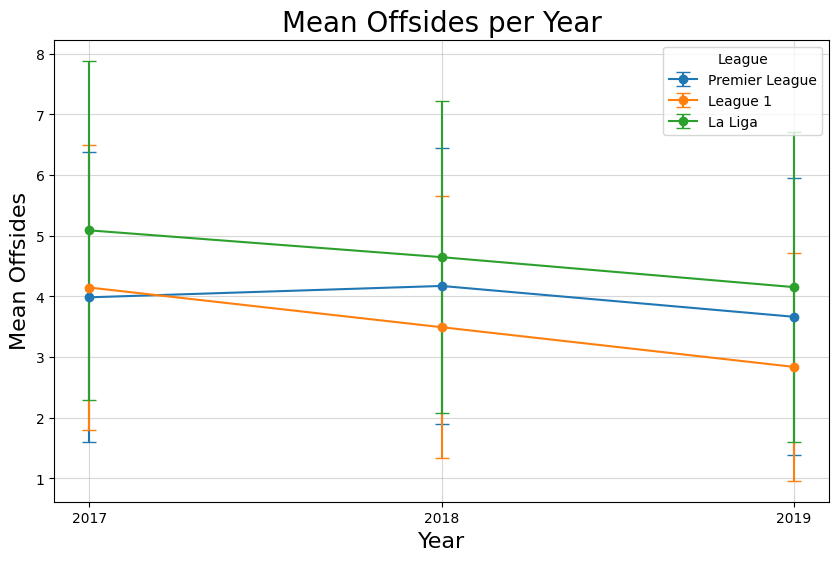

In [30]:
years = [2017, 2018, 2019]
leagues = [premier_league, league_1, la_liga]
league_names = ['Premier League', 'League 1', 'La Liga']
mean_std_list = []

for league, name in zip(leagues, league_names):
    for year in years:
        data = league.xs(year, level='year')['Offsides']
        mean_value = data.mean()
        std_value = data.std()
        mean_std_list.append({'Year': year, 'League': name, 'Mean': mean_value, 'Std': std_value})

mean_std_data = pd.DataFrame(mean_std_list)
mean_std_data['Year'] = mean_std_data['Year'].astype(int)
mean_std_data_pivot = mean_std_data.pivot(index='Year', columns='League', values=['Mean', 'Std'])


plt.figure(figsize=(10, 6))

for league_name in league_names:
    plt.errorbar(mean_std_data_pivot.index,
                 mean_std_data_pivot['Mean'][league_name],
                 yerr=mean_std_data_pivot['Std'][league_name],
                 label=league_name,
                 marker='o',
                 capsize=5)

plt.title('Mean Offsides per Year', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Mean Offsides', fontsize = 16)
plt.xticks(years)
plt.legend(title='League')
plt.grid(True, alpha = 0.5)
plt.show()

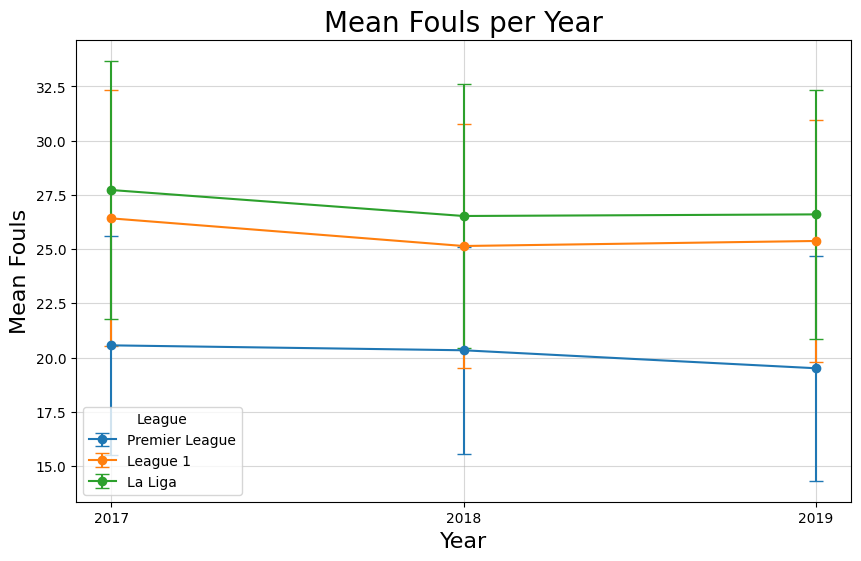

In [31]:
years = [2017, 2018, 2019]
leagues = [premier_league, league_1, la_liga]
league_names = ['Premier League', 'League 1', 'La Liga']
mean_std_list = []

for league, name in zip(leagues, league_names):
    for year in years:
        data = league.xs(year, level='year')['Fouls']
        mean_value = data.mean()
        std_value = data.std()
        mean_std_list.append({'Year': year, 'League': name, 'Mean': mean_value, 'Std': std_value})

mean_std_data = pd.DataFrame(mean_std_list)
mean_std_data['Year'] = mean_std_data['Year'].astype(int)
mean_std_data_pivot = mean_std_data.pivot(index='Year', columns='League', values=['Mean', 'Std'])


plt.figure(figsize=(10, 6))

for league_name in league_names:
    plt.errorbar(mean_std_data_pivot.index,
                 mean_std_data_pivot['Mean'][league_name],
                 yerr=mean_std_data_pivot['Std'][league_name],
                 label=league_name,
                 marker='o',
                 capsize=5)

plt.title('Mean Fouls per Year', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Mean Fouls', fontsize = 16)
plt.xticks(years)
plt.legend(title='League')
plt.grid(True, alpha = 0.5)
plt.show()

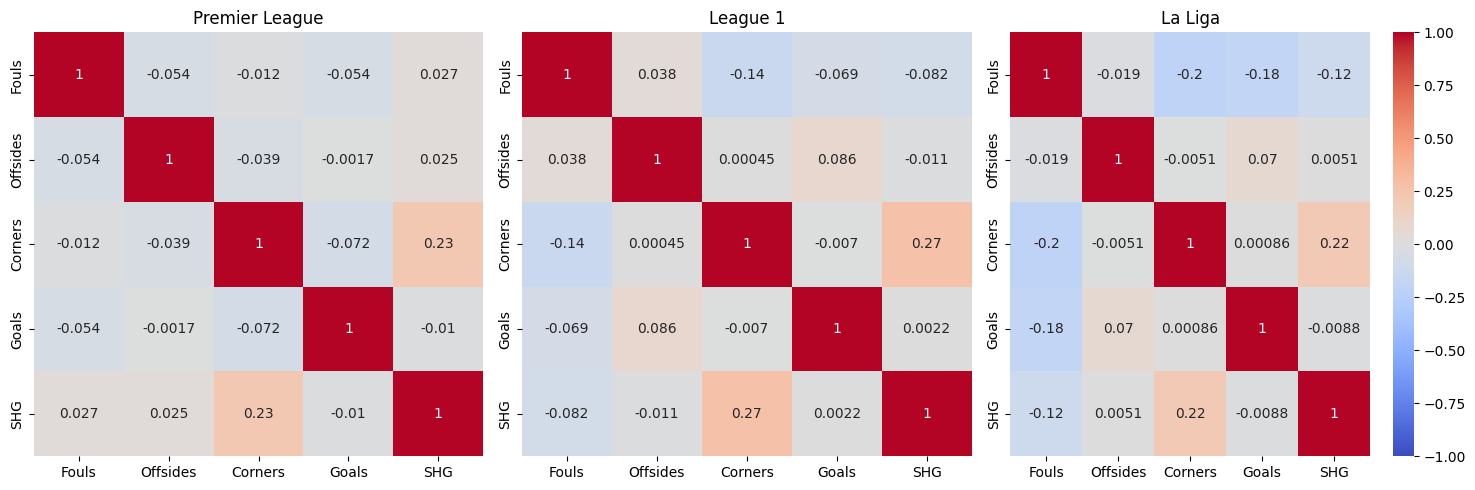

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15, 5))
sns.heatmap(premier_league.corr(), annot=True, cmap='coolwarm', ax=ax[0], cbar=False, vmin=-1, vmax=1)
ax[0].set_title('Premier League')
sns.heatmap(league_1.corr(), annot=True, cmap='coolwarm', ax=ax[1], cbar=False, vmin=-1, vmax=1)
ax[1].set_title('League 1')
sns.heatmap(la_liga.corr(), annot=True, cmap='coolwarm', ax=ax[2], cbar=True, vmin=-1, vmax=1)
ax[2].set_title('La Liga')
ax[2].tick_params(axis='x', labelrotation=0)

plt.tight_layout()
plt.show()

# **Conduct comparative analysis per team, per league, per season, and across the entire dataset**

In [33]:
relevant_incidents = ['GOAL1', 'GOAL2',
                      'CR1', 'CR2',
                      'FK1', 'FK2',
                      'SHG1', 'SHG2',
                      'F1', 'F2',
                      'O1', 'O2',
                      'SHB1', 'SHB2',
                      'SHW1', 'SHW2',
                      'TI1', 'TI2',
                      'GK1', 'GK2',
                      'BLOCKED1', 'BLOCKED2']

premier_filtered_df = df[df['Incident'].isin(relevant_incidents)]
premier_filtered_df['Year'] = pd.to_datetime(df['Timestamp']).dt.year

premier_home_agg = premier_filtered_df[premier_filtered_df['Incident'].str.endswith('1')].groupby(['HomeTeam', 'Year', 'Incident']).size().unstack(fill_value=0)
premier_home_agg.columns = [col[:-1] for col in premier_home_agg.columns]
premier_home_agg = premier_home_agg.add_prefix('Home_')


premier_away_agg = premier_filtered_df[premier_filtered_df['Incident'].str.endswith('2')].groupby(['AwayTeam', 'Year', 'Incident']).size().unstack(fill_value=0)
premier_away_agg.columns = [col[:-1] for col in premier_away_agg.columns]
premier_away_agg = premier_away_agg.add_prefix('Away_')


premier_combined = premier_home_agg.add(premier_away_agg, fill_value=0)
premier_combined.reset_index(inplace=True)
premier_combined.rename(columns={'HomeTeam': 'Team'}, inplace=True)


print(premier_combined)

                          Team  Year  Away_BLOCKED  Away_CR  Away_F  Away_FK  \
0              AFC Bournemouth  2017          13.0     51.0    88.0    166.0   
1              AFC Bournemouth  2018          25.0    108.0   150.0    258.0   
2              AFC Bournemouth  2019          35.0     96.0   178.0    245.0   
3                   Arsenal FC  2017          36.0     57.0   120.0    141.0   
4                   Arsenal FC  2018          31.0     85.0   176.0    232.0   
..                         ...   ...           ...      ...     ...      ...   
61          West Ham United FC  2017           8.0     41.0   107.0    168.0   
62          West Ham United FC  2018          17.0     62.0   150.0    248.0   
63          West Ham United FC  2019          27.0     89.0   187.0    229.0   
64  Wolverhampton Wanderers FC  2018          14.0     51.0   111.0     93.0   
65  Wolverhampton Wanderers FC  2019          32.0     98.0   208.0    184.0   

    Away_GK  Away_GOAL  Away_O  Away_SH

<ipython-input-33-e3c460dced1b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_filtered_df['Year'] = pd.to_datetime(df['Timestamp']).dt.year


In [34]:
relevant_incidents = ['GOAL1', 'GOAL2',
                      'CR1', 'CR2',
                      'FK1', 'FK2',
                      'SHG1', 'SHG2',
                      'F1', 'F2',
                      'O1', 'O2',
                      'SHB1', 'SHB2',
                      'SHW1', 'SHW2',
                      'TI1', 'TI2',
                      'GK1', 'GK2',
                      'BLOCKED1', 'BLOCKED2']


league_1_filtered_df = df1[df1['Incident'].isin(relevant_incidents)]
league_1_filtered_df['Year'] = pd.to_datetime(df1['Timestamp']).dt.year

league_1_home_agg = league_1_filtered_df[league_1_filtered_df['Incident'].str.endswith('1')].groupby(['HomeTeam', 'Year', 'Incident']).size().unstack(fill_value=0)
league_1_home_agg.columns = [col[:-1] for col in league_1_home_agg.columns]
league_1_home_agg = league_1_home_agg.add_prefix('Home_')

league_1_away_agg = league_1_filtered_df[league_1_filtered_df['Incident'].str.endswith('2')].groupby(['AwayTeam', 'Year', 'Incident']).size().unstack(fill_value=0)
league_1_away_agg.columns = [col[:-1] for col in league_1_away_agg.columns]
league_1_away_agg = league_1_away_agg.add_prefix('Away_')

league_1_combined = league_1_home_agg.add(league_1_away_agg, fill_value=0)
league_1_combined.reset_index(inplace=True)
league_1_combined.rename(columns={'HomeTeam': 'Team'}, inplace=True)

print(league_1_combined)

                Team  Year  Away_BLOCKED  Away_CR  Away_F  Away_FK  Away_GK  \
0       AS Monaco FC  2017          16.0     48.0   118.0    153.0     71.0   
1       AS Monaco FC  2018          26.0     71.0   237.0    284.0    168.0   
2       AS Monaco FC  2019          31.0     99.0   241.0    317.0    136.0   
3   AS Saint Etienne  2017           8.0     36.0   133.0    129.0     87.0   
4   AS Saint Etienne  2018          15.0     79.0   253.0    245.0    198.0   
..               ...   ...           ...      ...     ...      ...      ...   
59    Stade de Reims  2018           6.0     29.0   136.0    140.0     94.0   
60    Stade de Reims  2019          28.0     75.0   251.0    259.0    143.0   
61       Toulouse FC  2017          12.0     32.0   159.0    190.0     81.0   
62       Toulouse FC  2018          14.0     85.0   269.0    280.0    222.0   
63       Toulouse FC  2019          27.0     85.0   281.0    266.0    193.0   

    Away_GOAL  Away_O  Away_SHB  ...  Home_CR  Home

<ipython-input-34-fef3f1b5993b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_1_filtered_df['Year'] = pd.to_datetime(df1['Timestamp']).dt.year


In [35]:
relevant_incidents = ['GOAL1', 'GOAL2',
                      'CR1', 'CR2',
                      'FK1', 'FK2',
                      'SHG1', 'SHG2',
                      'F1', 'F2',
                      'O1', 'O2',
                      'SHB1', 'SHB2',
                      'SHW1', 'SHW2',
                      'TI1', 'TI2',
                      'GK1', 'GK2',
                      'BLOCKED1', 'BLOCKED2']


la_liga_filtered_df = df2[df2['Incident'].isin(relevant_incidents)]
la_liga_filtered_df['Year'] = pd.to_datetime(df1['Timestamp']).dt.year

la_liga_home_agg = la_liga_filtered_df[la_liga_filtered_df['Incident'].str.endswith('1')].groupby(['HomeTeam', 'Year', 'Incident']).size().unstack(fill_value=0)
la_liga_home_agg.columns = [col[:-1] for col in la_liga_home_agg.columns]
la_liga_home_agg = la_liga_home_agg.add_prefix('Home_')

la_liga_away_agg = la_liga_filtered_df[la_liga_filtered_df['Incident'].str.endswith('2')].groupby(['AwayTeam', 'Year', 'Incident']).size().unstack(fill_value=0)
la_liga_away_agg.columns = [col[:-1] for col in la_liga_away_agg.columns]
la_liga_away_agg = la_liga_away_agg.add_prefix('Away_')

la_liga_combined = la_liga_home_agg.add(la_liga_away_agg, fill_value=0)
la_liga_combined.reset_index(inplace=True)
la_liga_combined.rename(columns={'HomeTeam': 'Team'}, inplace=True)

print(la_liga_combined)

<ipython-input-35-1106b991f569>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_filtered_df['Year'] = pd.to_datetime(df1['Timestamp']).dt.year


                    Team    Year  Away_BLOCKED  Away_CR  Away_F  Away_FK  \
0   Athletic Club Bilbao  2017.0           6.0     44.0   122.0    130.0   
1   Athletic Club Bilbao  2018.0          12.0     61.0   245.0    233.0   
2   Athletic Club Bilbao  2019.0          10.0     73.0   287.0    306.0   
3     Atletico de Madrid  2017.0          12.0     28.0   143.0    146.0   
4     Atletico de Madrid  2018.0          19.0     75.0   219.0    207.0   
..                   ...     ...           ...      ...     ...      ...   
61           Valencia CF  2018.0          29.0     56.0   228.0    309.0   
62           Valencia CF  2019.0          19.0     68.0   189.0    267.0   
63         Villarreal CF  2017.0          11.0     40.0   202.0    165.0   
64         Villarreal CF  2018.0          18.0     51.0   179.0    200.0   
65         Villarreal CF  2019.0          31.0     82.0   268.0    255.0   

    Away_GK  Away_GOAL  Away_O  Away_SHB  ...  Home_CR  Home_F  Home_FK  \
0      74.0 

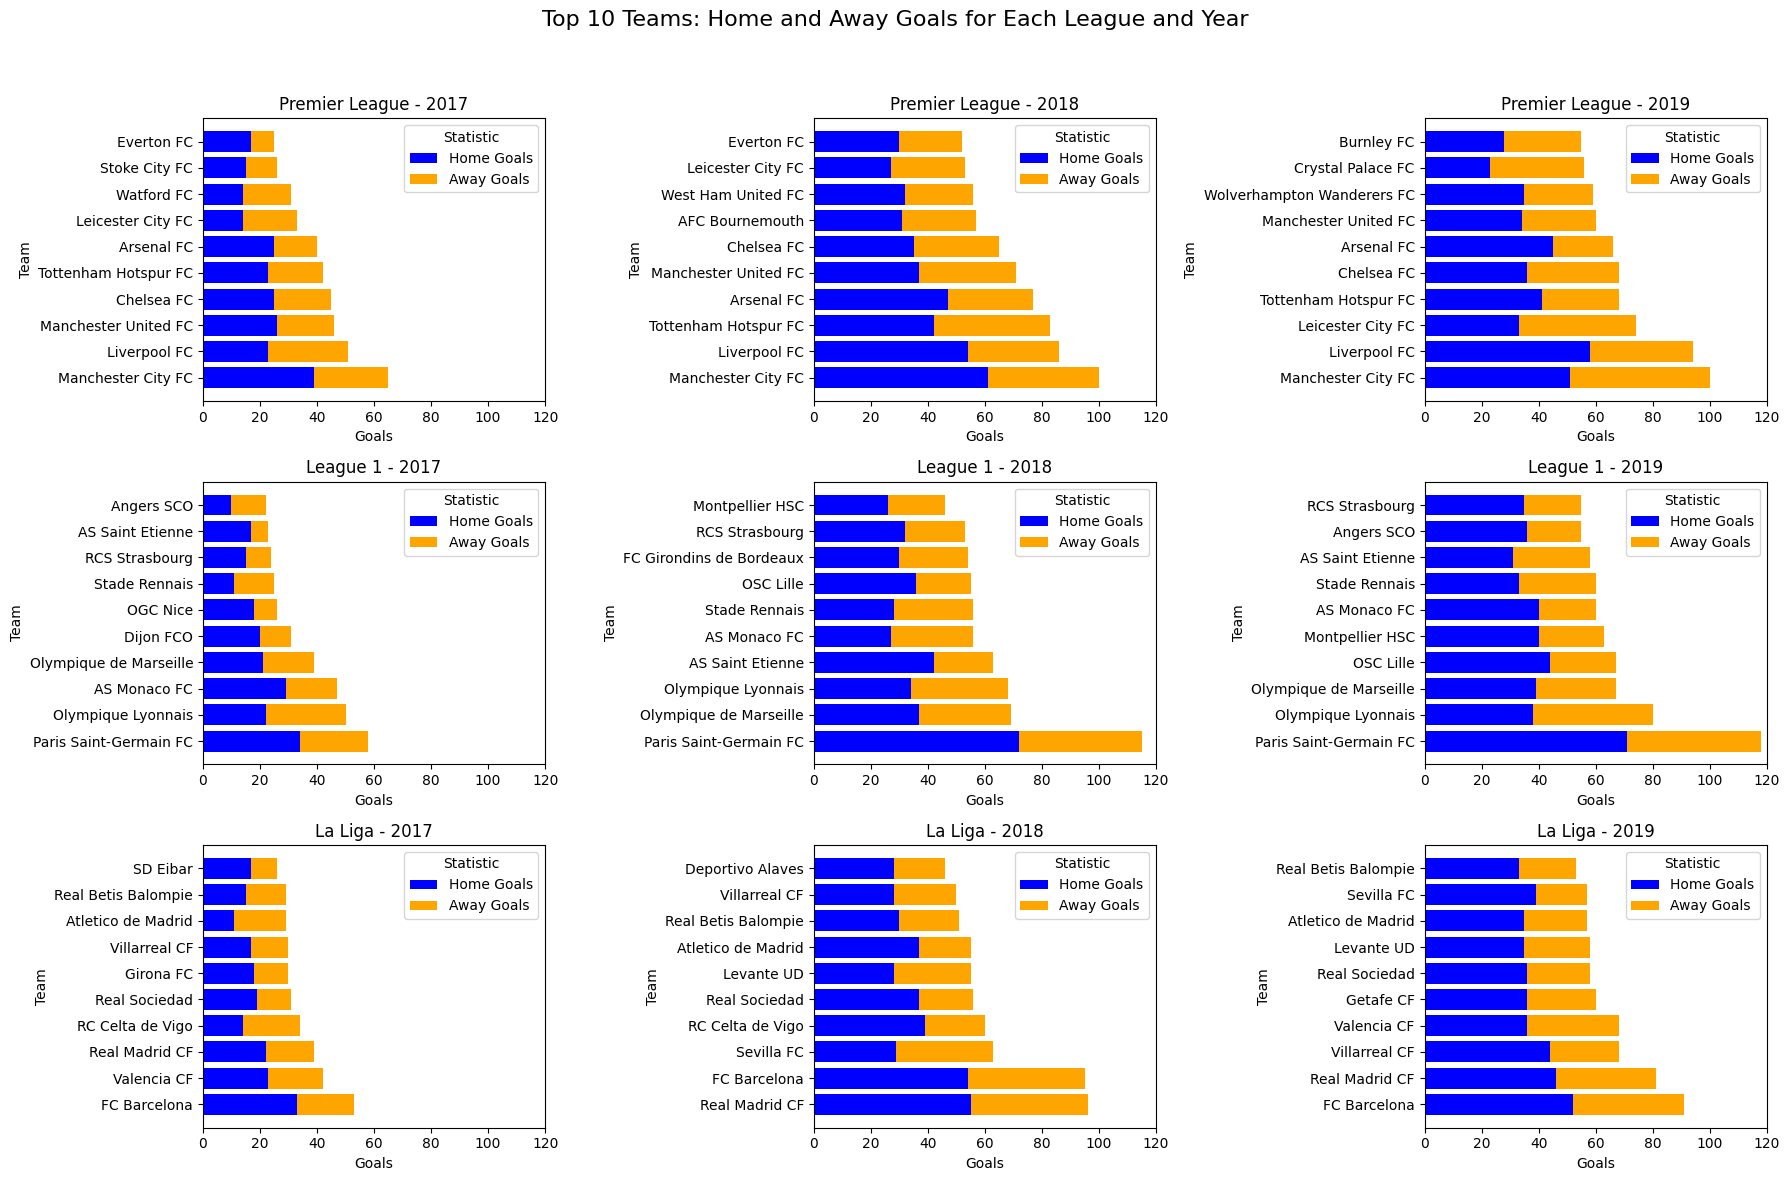

In [36]:
years = [2017, 2018, 2019]
leagues = [premier_combined, league_1_combined, la_liga_combined]
league_names = ['Premier League', 'League 1', 'La Liga']

# Create the figure and axes for the 3x3 grid
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Top 10 Teams: Home and Away Goals for Each League and Year', fontsize=16)

for row, league in enumerate(leagues):
    for col, year in enumerate(years):
        # Filter the data for the specific year
        data = league[league['Year'] == year].groupby('Team').sum()[['Home_GOAL', 'Away_GOAL']]

        # Get the top 10 teams based on the total goals
        top_teams = data.assign(Total_Goals=data['Home_GOAL'] + data['Away_GOAL']).sort_values(by='Total_Goals', ascending=False).head(10)

        # Plot stacked bar chart
        p1 = ax[row, col].barh(top_teams.index, top_teams['Home_GOAL'], color='blue', label='Home Goals')
        p2 = ax[row, col].barh(top_teams.index, top_teams['Away_GOAL'], left=top_teams['Home_GOAL'], color='orange', label='Away Goals')

        # Set the title and labels
        ax[row, col].set_title(f'{league_names[row]} - {year}')
        ax[row, col].set_xlabel('Goals')
        ax[row, col].set_ylabel('Team')
        ax[row, col].set_xlim(0, 120)  # Adjust x-axis limits for better readability
        ax[row, col].legend(title='Statistic')

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

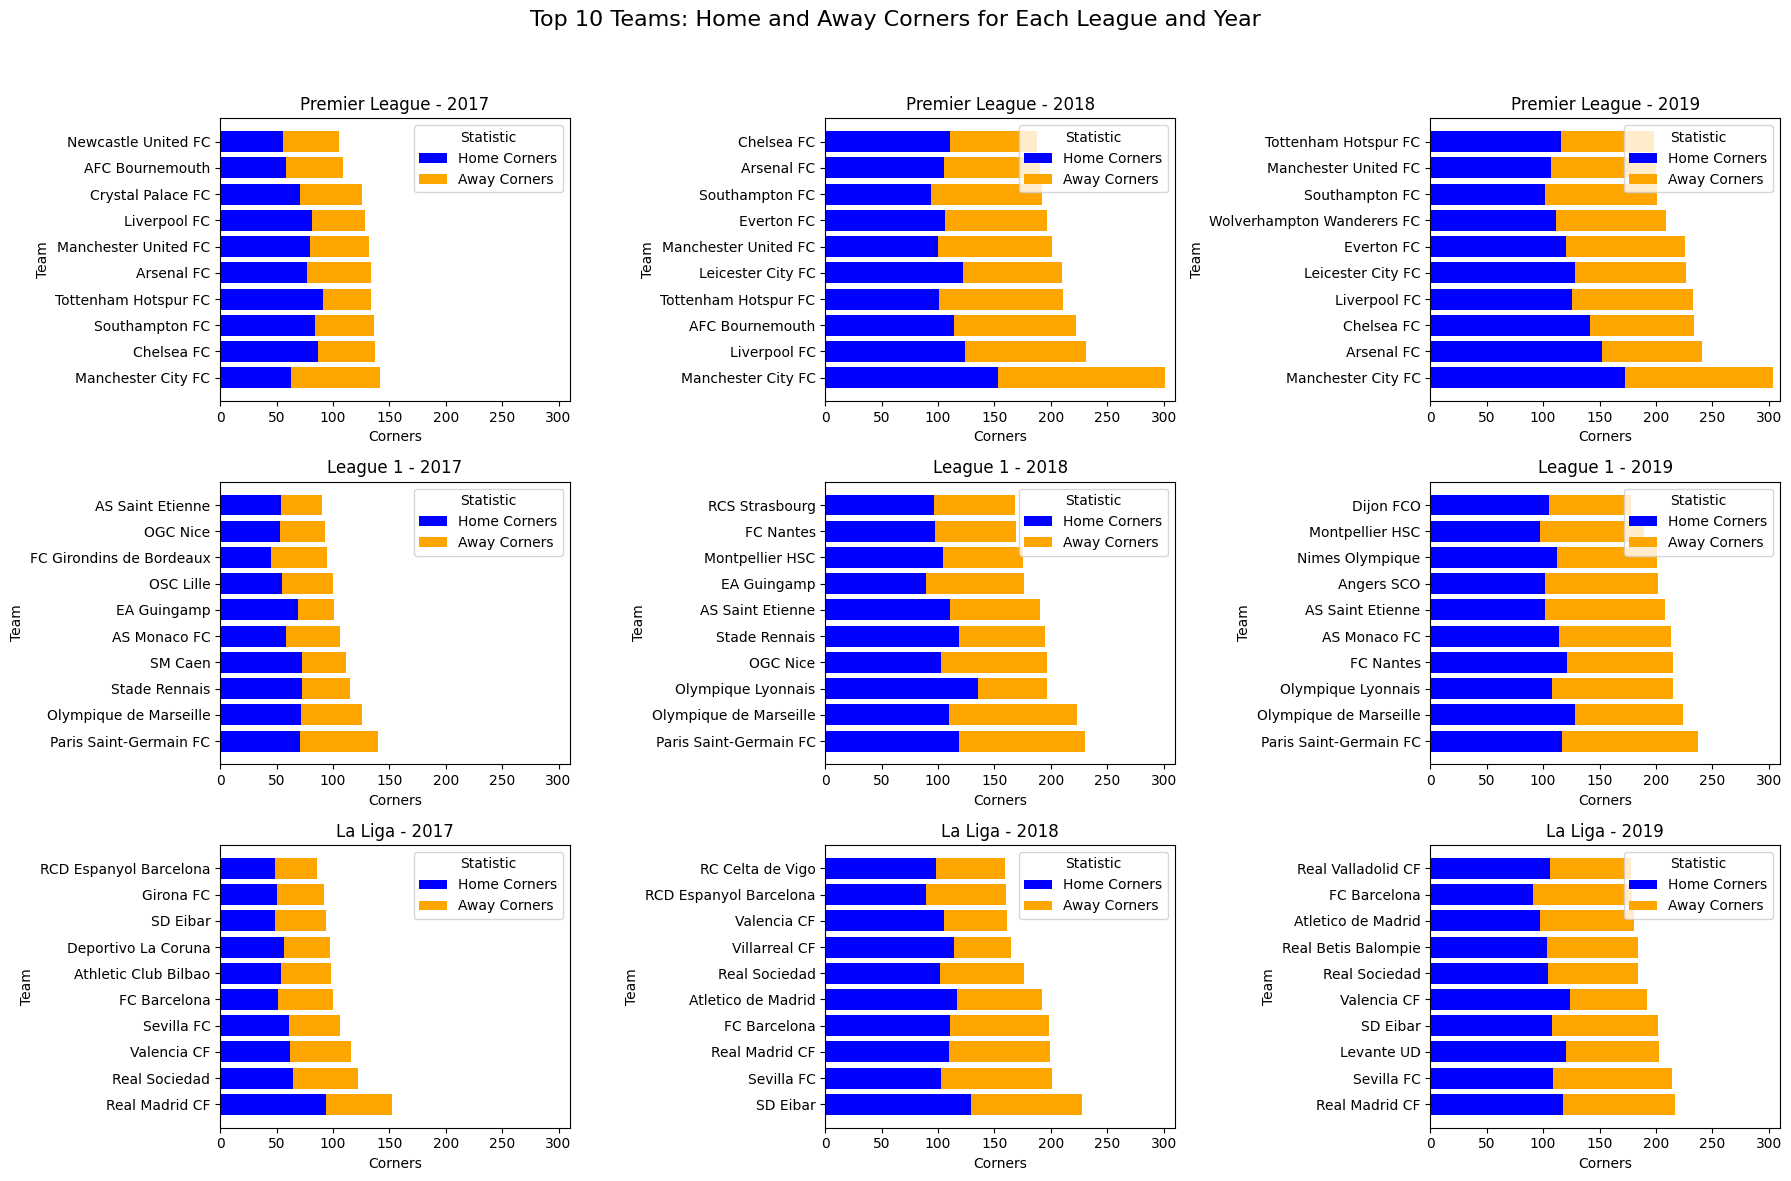

In [37]:
years = [2017, 2018, 2019]
leagues = [premier_combined, league_1_combined, la_liga_combined]
league_names = ['Premier League', 'League 1', 'La Liga']


fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Top 10 Teams: Home and Away Corners for Each League and Year', fontsize=16)

for row, league in enumerate(leagues):
    for col, year in enumerate(years):
        data = league[league['Year'] == year].groupby('Team').sum()[['Home_CR', 'Away_CR']]
        top_teams = data.assign(Total_Corners=data['Home_CR'] + data['Away_CR']).sort_values(by='Total_Corners', ascending=False).head(10)


        p1 = ax[row, col].barh(top_teams.index, top_teams['Home_CR'], color='blue', label='Home Corners')
        p2 = ax[row, col].barh(top_teams.index, top_teams['Away_CR'], left=top_teams['Home_CR'], color='orange', label='Away Corners')


        ax[row, col].set_title(f'{league_names[row]} - {year}')
        ax[row, col].set_xlabel('Corners')
        ax[row, col].set_ylabel('Team')
        ax[row, col].set_xlim(0, 310)
        ax[row, col].legend(title='Statistic')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

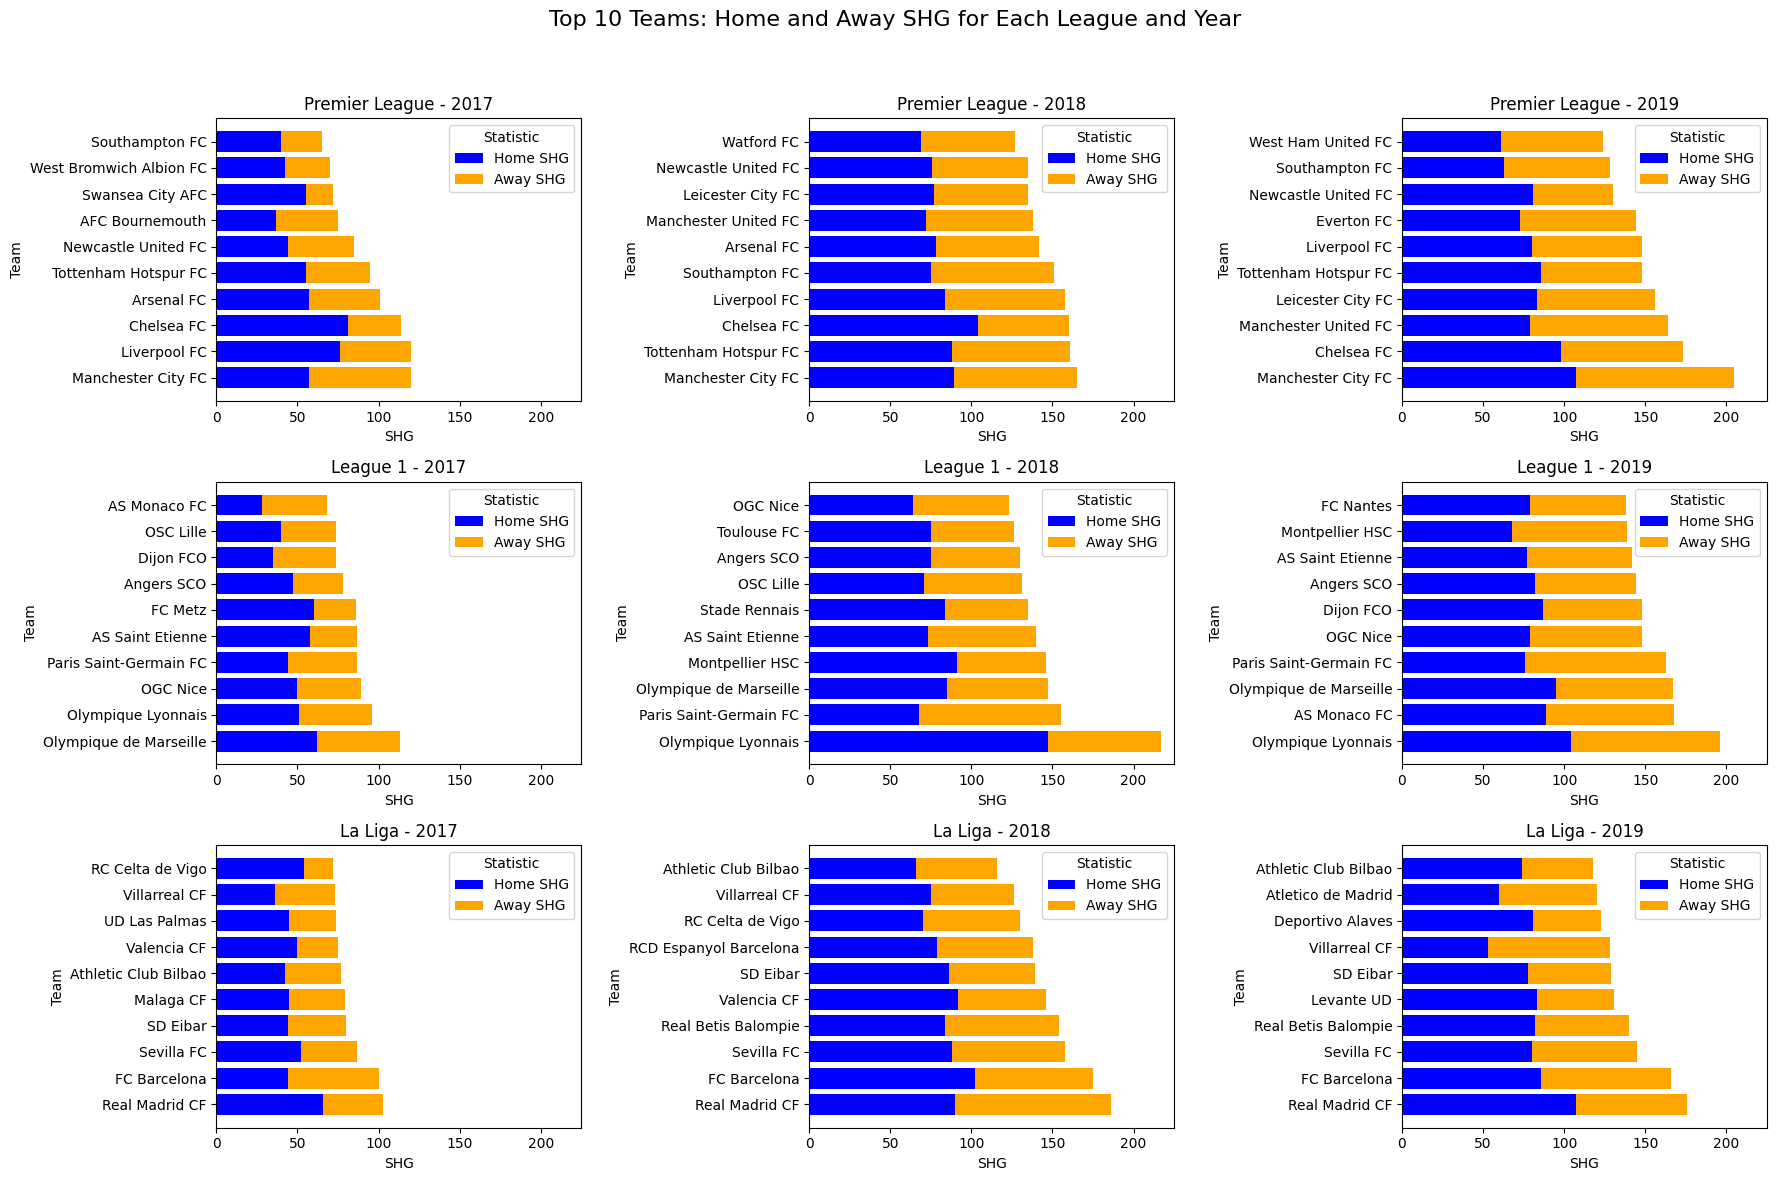

In [38]:
years = [2017, 2018, 2019]
leagues = [premier_combined, league_1_combined, la_liga_combined]
league_names = ['Premier League', 'League 1', 'La Liga']


fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Top 10 Teams: Home and Away SHG for Each League and Year', fontsize=16)

for row, league in enumerate(leagues):
    for col, year in enumerate(years):
        data = league[league['Year'] == year].groupby('Team').sum()[['Home_SHG', 'Away_SHG']]
        top_teams = data.assign(Total_SHG=data['Home_SHG'] + data['Away_SHG']).sort_values(by='Total_SHG', ascending=False).head(10)


        p1 = ax[row, col].barh(top_teams.index, top_teams['Home_SHG'], color='blue', label='Home SHG')
        p2 = ax[row, col].barh(top_teams.index, top_teams['Away_SHG'], left=top_teams['Home_SHG'], color='orange', label='Away SHG')


        ax[row, col].set_title(f'{league_names[row]} - {year}')
        ax[row, col].set_xlabel('SHG')
        ax[row, col].set_ylabel('Team')
        ax[row, col].set_xlim(0, 225)
        ax[row, col].legend(title='Statistic')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

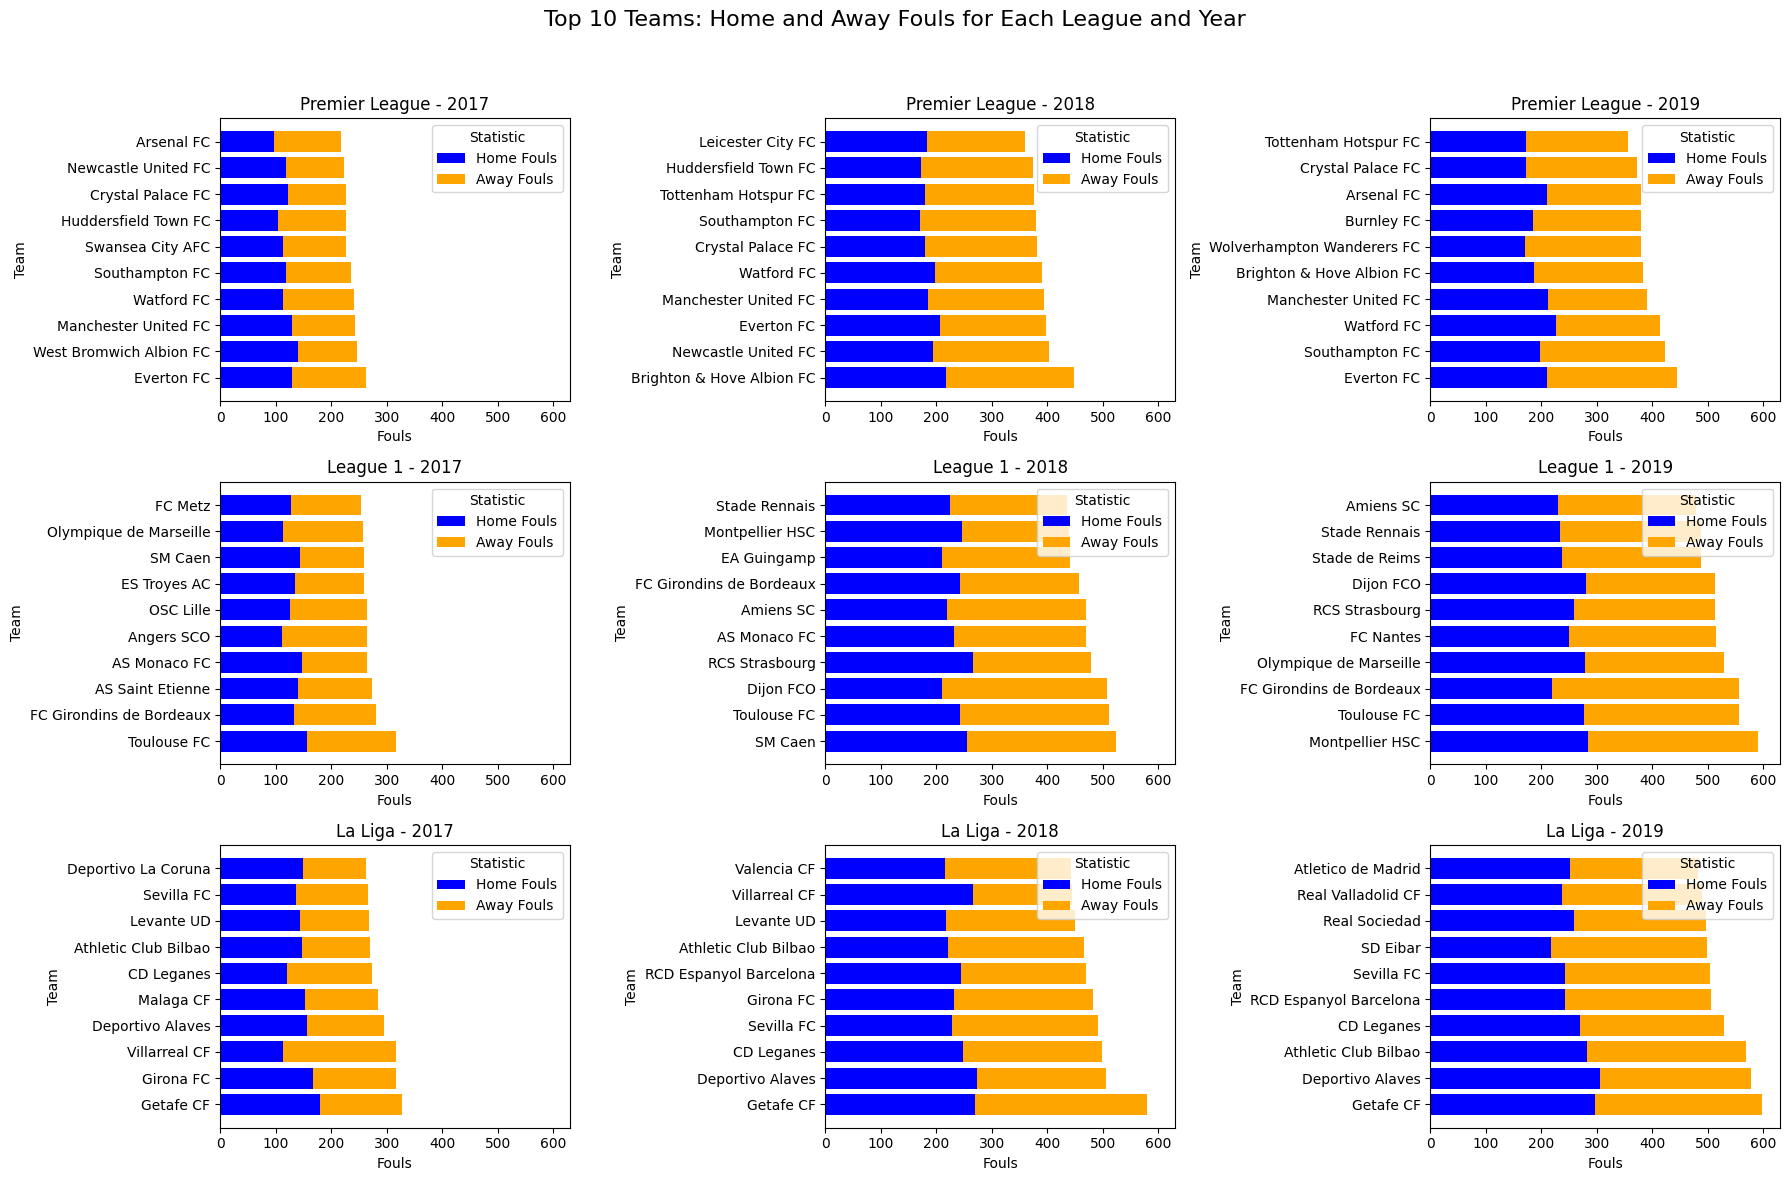

In [43]:
years = [2017, 2018, 2019]
leagues = [premier_combined, league_1_combined, la_liga_combined]
league_names = ['Premier League', 'League 1', 'La Liga']


fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Top 10 Teams: Home and Away Fouls for Each League and Year', fontsize=16)

for row, league in enumerate(leagues):
    for col, year in enumerate(years):
        data = league[league['Year'] == year].groupby('Team').sum()[['Home_F', 'Away_F']]
        top_teams = data.assign(Total_F=data['Home_F'] + data['Away_F']).sort_values(by='Total_F', ascending=False).head(10)


        p1 = ax[row, col].barh(top_teams.index, top_teams['Home_F'], color='blue', label='Home Fouls')
        p2 = ax[row, col].barh(top_teams.index, top_teams['Away_F'], left=top_teams['Home_F'], color='orange', label='Away Fouls')


        ax[row, col].set_title(f'{league_names[row]} - {year}')
        ax[row, col].set_xlabel('Fouls')
        ax[row, col].set_ylabel('Team')
        ax[row, col].set_xlim(0, 630)
        ax[row, col].legend(title='Statistic')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [42]:
1+1

2